# 'dont forget to fine tune the models '


# Import libraries and data

A weather dataset of Cluj Napoca taken from the OpenWheather History API. It was scraped from the Open Weather Map using their Weather API. The data collected was from January 1st 2008 until May 2023 at an hourly rate.

Reference: https://huggingface.co/datasets/LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data/blob/main/Long%20Term%20Time%20Series%20Forecasting%20for%20Cluj-Napoca%20Weather%20Prediction.pdf


In [78]:
import sys

from sklearn.linear_model import LinearRegression

print(sys.executable)

d:\Master\Python and advacned data science\weather_venv\Scripts\python.exe


In [79]:
import numpy as np
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import pygwalker

In [80]:
ds = load_dataset("LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data")
df = ds["train"].to_pandas()

View Cluj-Napoca city on a map.

In [81]:
import folium
import webbrowser

Cluj_map = folium.Map(location = [df['lat'][0],df['lon'][0]], zoom_start=12)
Cluj_map.save('map.html')
webbrowser.open_new_tab('map.html')

True

View dataset sample records:

In [82]:
df.sample(20)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
33130,1313438400,2011-08-15 20:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,18.90,10000.0,16.69,19.12,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
115699,1600398000,2020-09-18 03:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,13.99,10000.0,10.22,13.48,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
83139,1487030400,2017-02-14 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.11,7000.0,-6.86,-6.44,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
94541,1526626800,2018-05-18 07:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,16.81,9999.0,10.43,16.27,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
116025,1601546400,2020-10-01 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.12,10000.0,9.36,13.49,...,NaN,0.14,NaN,NaN,NaN,40,500,Rain,light rain,10d
46910,1361073600,2013-02-17 04:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-1.42,10000.0,-2.03,-4.78,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
34740,1319176800,2011-10-21 06:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,5.49,5000.0,4.90,3.94,...,NaN,0.33,NaN,NaN,NaN,20,701,Mist,mist,50d
55612,1391158800,2014-01-31 09:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.83,10000.0,-9.27,-10.30,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
7310,1224626400,2008-10-21 22:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,4.23,10000.0,3.80,4.23,...,NaN,NaN,NaN,NaN,NaN,0,701,Mist,mist,50n
134111,1664625600,2022-10-01 12:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,24.70,10000.0,9.44,24.22,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d


# Initial Understanding

Shape of the dataframe, showing that we are having more than one hundred records with 28 attributes as shown on the sample above.

In [83]:
df.shape

(139394, 28)

Vew all column names and column types (i.e. pandas type of each series).

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139394 entries, 0 to 139393
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   139394 non-null  int64  
 1   dt_iso               139394 non-null  object 
 2   timezone             139394 non-null  int64  
 3   city_name            139394 non-null  object 
 4   lat                  139394 non-null  float64
 5   lon                  139394 non-null  float64
 6   temp                 139394 non-null  float64
 7   visibility           137498 non-null  float64
 8   dew_point            139391 non-null  float64
 9   feels_like           139394 non-null  float64
 10  temp_min             139394 non-null  float64
 11  temp_max             139394 non-null  float64
 12  pressure             139394 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0 non-null       float64
 15  humidity         

One good thing about this dataset is that all the column names follow the best practices for analysis. Therefore, renaming the columns is not necessary.

In [85]:
df.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [86]:
df.dtypes

dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
visibility             float64
dew_point              float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
wind_gust              float64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

View general statistics figure of numeric data.

In [87]:
df.describe()

,dt,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,...,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,1.393940e+05,139394.000000,1.393940e+05,1.393940e+05,139394.000000,137498.000000,139391.000000,139394.000000,139394.000000,139394.000000,...,139394.000000,139394.000000,139394.000000,10915.000000,19027.000000,1847.000000,4572.000000,821.000000,139394.000000,139394.000000
mean,1.440551e+09,9251.649282,4.676714e+01,2.359214e+01,9.618191,8693.875169,5.084661,8.529267,8.327400,12.116846,...,75.657396,2.390518,154.977940,5.031590,0.605345,1.859643,0.361105,0.908526,38.215605,728.715253
std,1.396620e+08,1782.328653,2.131636e-14,1.065818e-14,47.385004,2743.282608,7.568612,47.556514,47.396329,9.727896,...,19.817223,26.828828,117.502033,3.494126,0.876458,3.033603,0.300892,1.108691,38.417129,121.070155
min,1.199146e+09,7200.000000,4.676714e+01,2.359214e+01,-9998.770000,49.000000,-24.390000,-10005.770000,-9998.960000,-275.450000,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.100000,0.000000,200.000000
25%,1.319538e+09,7200.000000,4.676714e+01,2.359214e+01,2.240000,9999.000000,-0.450000,0.690000,0.840000,4.700000,...,62.000000,1.030000,60.000000,3.000000,0.180000,0.200000,0.160000,0.200000,0.000000,701.000000
50%,1.440347e+09,10800.000000,4.676714e+01,2.359214e+01,9.700000,10000.000000,5.150000,8.800000,8.450000,12.000000,...,81.000000,2.000000,130.000000,5.000000,0.330000,0.800000,0.260000,0.500000,20.000000,800.000000
75%,1.561060e+09,10800.000000,4.676714e+01,2.359214e+01,16.910000,10000.000000,11.350000,16.700000,15.750000,19.400000,...,93.000000,3.100000,270.000000,7.000000,0.700000,2.000000,0.450000,1.000000,75.000000,801.000000
max,1.682982e+09,10800.000000,4.676714e+01,2.359214e+01,37.610000,10000.000000,25.190000,37.740000,37.000000,42.700000,...,100.000000,9999.000000,360.000000,24.200000,18.000000,27.000000,2.280000,9.000000,100.000000,804.000000


Add description for each attribute.

!warning PLEASE DOUBLE CHECK.

In [88]:
attribute_dict = {}
attribute_dict['dt'] = 'Time of data calculation, unix, UTC'
attribute_dict['dt_iso'] = 'Date and time in UTC format'
attribute_dict['timezone'] = 'Shift in seconds from UTC'
attribute_dict['city_name'] = 'City name'
attribute_dict['lat'] = 'Geographical coordinates of the location (latitude)'
attribute_dict['lon'] = 'Geographical coordinates of the location (longitude)'
attribute_dict['temp'] = 'Temperature'
attribute_dict['visibility'] = 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.'
attribute_dict['dew_point'] = 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form'
attribute_dict['feels_like'] = 'This temperature parameter accounts for the human perception of weather'
attribute_dict['temp_min'] = 'Minimum temperature at the moment (optional)'
attribute_dict['temp_max'] = 'Maximum temperature at the moment (optional)'
attribute_dict['pressure'] = 'N/A'
attribute_dict['sea_level'] = 'N/A'
attribute_dict['grnd_level'] = 'N/A'
attribute_dict['humidity'] = 'Humidity, %'
attribute_dict['wind_speed'] = 'N/A'
attribute_dict['wind_deg'] = 'Wind direction, degrees (meteorological)'
attribute_dict['wind_gust'] = 'N/A'
attribute_dict['rain_1h'] = 'Rain volume for the last hour, mm'
attribute_dict['rain_3h'] = 'Rain volume for the last 3 hours, mm'
attribute_dict['snow_1h'] = 'Snow volume for the last hour, mm (in liquid state)'
attribute_dict['snow_3h'] = 'Snow volume for the last 3 hours, mm (in liquid state)'
attribute_dict['clouds_all'] = 'Cloudiness, %'
attribute_dict['weather_id'] = 'Weather condition id'
attribute_dict['weather_main'] = 'Group of weather parameters (Rain, Snow, Extreme etc.)'
attribute_dict['weather_description'] = 'Weather condition within the group'
attribute_dict['weather_icon'] = 'Weather icon id'

attribute_dict

{'dt': 'Time of data calculation, unix, UTC',
 'dt_iso': 'Date and time in UTC format',
 'timezone': 'Shift in seconds from UTC',
 'city_name': 'City name',
 'lat': 'Geographical coordinates of the location (latitude)',
 'lon': 'Geographical coordinates of the location (longitude)',
 'temp': 'Temperature',
 'visibility': 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.',
 'dew_point': 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form',
 'feels_like': 'This temperature parameter accounts for the human perception of weather',
 'temp_min': 'Minimum temperature at the moment (optional)',
 'temp_max': 'Maximum temperature at the moment (optional)',
 'pressure': 'N/A',
 'sea_level': 'N/A',
 'grnd_level': 'N/A',
 'humidity': 'Humidity, %',


Take the first record as an example, here's a data explanation [AI-generated]:

"
This record describes **cold, humid, and snowy winter weather** during the **early hours of January 1, 2008**, in **Cluj-Napoca, Romania**.

* The **temperature** was around **-9.5°C**, with the **"feels like"** temperature matching it, suggesting calm wind conditions with minimal wind chill.
* The **humidity** was high at **92%**, and the **dew point** was close to the actual temperature, indicating **saturation**—ideal for **snow or frost**.
* The **weather condition** was classified as **"light snow"**, supported by 100% **cloud cover** and reduced **visibility** (4 km). This suggests snowfall was occurring but **not heavy**.
* **No recent measurable precipitation** (rain or snow) was recorded in the last 1 or 3 hours, which could imply **light, intermittent snowflakes** without accumulation.
* **Wind was light** (1.0 m/s) from the **east-southeast (110°)**, with **no gusts** reported, contributing to the stable "feels like" temperature.
* **Pressure** was **high (1024 hPa)**, indicating a likely presence of a **cold, stable air mass**, often associated with winter conditions.
* **No data** was available for **sea level and ground-level pressure**, but this is not uncommon for historical or location-specific datasets.

**Summary:**

This was a **quiet, wintry night** with **light snow**, **cold temperatures**, **high humidity**, **calm winds**, and **no significant precipitation** accumulation—typical of **a stable, frosty weather pattern** in a continental climate zone.
"

In [89]:
print(df.iloc[0])

dt                                                     1199145600
dt_iso                              2008-01-01 00:00:00 +0000 UTC
timezone                                                     7200
city_name              Universitatea Babeș-Bolyai din Cluj-Napoca
lat                                                     46.767141
lon                                                     23.592139
temp                                                        -9.46
visibility                                                 4000.0
dew_point                                                   -10.4
feels_like                                                  -9.46
temp_min                                                   -11.37
temp_max                                                    -7.64
pressure                                                     1024
sea_level                                                     NaN
grnd_level                                                    NaN
humidity  

# Data cleaning

We will now introduce a cleaned_df dataframe, that store the results after each cleaning step. The copy() function specify that this is a new and separate dataframe that is not just reference to the orignial one.


In [90]:
cleaned_df = df.copy()

### Missing data

Check missing value.

In [91]:
df.isna().sum()

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
visibility               1896
dew_point                   3
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              139394
grnd_level             139394
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust              128479
rain_1h                120367
rain_3h                137547
snow_1h                134822
snow_3h                138573
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [92]:
bool_series = pd.isna(df["visibility"])
df[bool_series]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
463,1200722400,2008-01-19 06:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.77,NaN,0.35,-1.56,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
464,1200726000,2008-01-19 07:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.51,NaN,0.09,0.51,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50d
465,1200729600,2008-01-19 08:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.48,NaN,1.20,1.48,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50d
466,1200733200,2008-01-19 09:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,2.46,NaN,2.32,2.46,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50d
467,1200736800,2008-01-19 10:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,3.53,NaN,3.39,3.53,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135005,1667718000,2022-11-06 07:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,7.68,NaN,6.93,6.48,...,NaN,NaN,NaN,NaN,NaN,96,804,Clouds,overcast clouds,04d
135170,1668276000,2022-11-12 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,5.33,NaN,3.98,4.30,...,NaN,NaN,NaN,NaN,NaN,7,800,Clear,sky is clear,01n
138339,1679324400,2023-03-20 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
138604,1680271200,2023-03-31 14:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-10005.77,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d


The missing data might occurs due to several reasons, including but not limited to:
- Many stations lack sensors for visibility, sea_level, grnd_level, or wind_gust.
- Fields like wind_gust, rain_1h, snow_3h, and visibility are only reported if there's a significant event.
- Missing rain_*, snow_*, and sometimes wind_gust usually means "none occurred", not bad data.
- Some older or low-cost stations may not report all measurements (e.g., visibility in remote locations).
- Data may be excluded due to dropped signals or formatting in real-time APIs.

We will not take actions on the Missing data until fulfilling missing data is required for analysis.

### Duplicated data

There is no exact duplicate records.

In [93]:
df.loc[df.duplicated()]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon


However, within specific time and location subsets, there are 4,994 duplicate instances — meaning multiple records exist for the same location at the exact same timestamp. This can occur due to data being collected from multiple sources or sensors, variations between forecasted and observed data, or delays and overlaps in data reporting and aggregation.

It is not possible to conclude which record might be the accurate data. Hence, we will keep this for further analysis at this moment.

In [94]:
df.loc[df.duplicated(subset=['dt','dt_iso', 'timezone', 'city_name', 'lat', 'lon'])].sort_values(by=['dt'])

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
18,1199206800,2008-01-01 17:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-5.21,4000.0,-5.93,-5.21,...,NaN,NaN,NaN,0.15,NaN,100,600,Snow,light snow,13n
20,1199210400,2008-01-01 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.69,4000.0,-5.41,-4.69,...,NaN,NaN,NaN,0.23,NaN,100,600,Snow,light snow,13n
22,1199214000,2008-01-01 19:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.42,4000.0,-5.14,-4.42,...,NaN,NaN,NaN,0.30,NaN,100,600,Snow,light snow,13n
24,1199217600,2008-01-01 20:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.15,2000.0,-4.75,-4.15,...,NaN,NaN,NaN,0.30,NaN,100,600,Snow,light snow,13n
26,1199221200,2008-01-01 21:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-3.87,2000.0,-4.47,-3.87,...,NaN,NaN,NaN,NaN,1.0,100,600,Snow,light snow,13n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138774,1680768000,2023-04-06 08:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.11,2000.0,-1.93,-5.13,...,NaN,NaN,NaN,0.65,NaN,100,701,Mist,mist,50d
138776,1680771600,2023-04-06 09:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.34,5000.0,-2.39,-4.27,...,NaN,NaN,NaN,0.60,NaN,100,701,Mist,mist,50d
138778,1680775200,2023-04-06 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.59,5000.0,-1.30,-4.61,...,NaN,NaN,NaN,0.59,NaN,100,701,Mist,mist,50d
138782,1680786000,2023-04-06 13:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.68,5000.0,-2.09,-4.49,...,NaN,NaN,NaN,0.30,NaN,100,701,Mist,mist,50d


In [95]:
count = df['dt'].value_counts()
count.sort_values(ascending=False)

dt
1640602800    3
1640617200    3
1640620800    3
1640624400    3
1640631600    3
             ..
1682971200    1
1682974800    1
1682978400    1
1682982000    1
1622502000    1
Name: count, Length: 134400, dtype: int64

In [96]:
cleaned_df.query('dt==1199664000') # why do we have 2 different weather conclusions for the exact same time of the year?

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
159,1199664000,2008-01-07 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.06,10000.0,-1.33,-0.06,...,NaN,NaN,NaN,0.41,NaN,100,500,Rain,light rain,10n
160,1199664000,2008-01-07 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.06,10000.0,-1.33,-0.06,...,NaN,NaN,NaN,0.41,NaN,100,600,Snow,light snow,13n


Once decided to drop some records, we will reset the dataframe index.

In [97]:
# cleaned_df.reset_index(drop=True)

## Feature Understanding

In [98]:
df.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

### Date

The date time is currently in an 'object' type. We will convert this into date time format for easier manipulations.

In [99]:
# remove the 'utc' text at the end of the string
cleaned_df['dt_iso']  = df['dt_iso'].str.replace(" UTC", "", regex=False)
# convert the updated string to date time type
cleaned_df['dt_iso'] = pd.to_datetime(cleaned_df['dt_iso'], utc=True)
# validate updated type
cleaned_df['dt_iso'].dtype

datetime64[ns, UTC]

In [100]:
cleaned_df.sort_values(by='dt_iso', axis=0, ascending=True)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,1199149200,2008-01-01 01:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,1199152800,2008-01-01 02:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,1199156400,2008-01-01 03:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,12.61,10000.0,4.57,11.44,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139390,1682971200,2023-05-01 20:00:00+00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.61,10000.0,5.58,9.58,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139391,1682974800,2023-05-01 21:00:00+00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.07,10000.0,6.04,9.12,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139392,1682978400,2023-05-01 22:00:00+00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,9.80,10000.0,6.70,9.80,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


In [101]:
# Parse datetime and extract time features
# cleaned_df['dt_iso'] = pd.to_datetime(df['dt_iso'].str.replace(' +0000 UTC', '', regex=False))
cleaned_df['hour'] = cleaned_df['dt_iso'].dt.hour
cleaned_df['day'] = cleaned_df['dt_iso'].dt.day
cleaned_df['month'] = cleaned_df['dt_iso'].dt.month
cleaned_df['year'] = cleaned_df['dt_iso'].dt.year
cleaned_df['weekday'] = cleaned_df['dt_iso'].dt.weekday

cleaned_df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,100,701,Mist,mist,50n,4,1,1,2008,1


<Axes: xlabel='dt', ylabel='Count'>

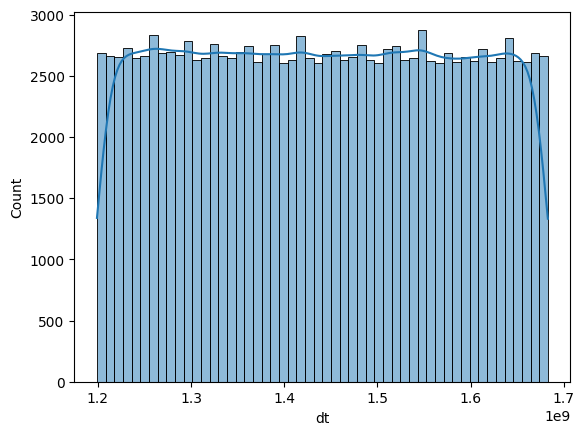

In [102]:
sns.histplot(df['dt'], kde=True)

### City info

Since the dataset is specifically collected for Cluj-Napoca, some attribute seems redundant.


In [103]:
for i in df.columns[2:6]:
    print(f'Unique values of {i} are {pd.unique(df[i])}')


Unique values of timezone are [ 7200 10800]
Unique values of city_name are ['Universitatea Babeș-Bolyai din Cluj-Napoca']
Unique values of lat are [46.767141]
Unique values of lon are [23.592139]


Except for the timezones, since Cluj-Napoca shifts time in Summer (Daylight saving time). We will, however, remove the others columns that are not necessary.

In [104]:
cleaned_df = cleaned_df.drop(df.columns[2:6], axis=1).copy()
cleaned_df

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00+00:00,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,NaN,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,NaN,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,NaN,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00+00:00,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,NaN,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00+00:00,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,NaN,...,100,701,Mist,mist,50n,4,1,1,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,12.61,10000.0,4.57,11.44,12.04,13.42,1019,NaN,...,0,800,Clear,sky is clear,01n,19,1,5,2023,0
139390,1682971200,2023-05-01 20:00:00+00:00,10.61,10000.0,5.58,9.58,9.85,11.83,1019,NaN,...,0,800,Clear,sky is clear,01n,20,1,5,2023,0
139391,1682974800,2023-05-01 21:00:00+00:00,10.07,10000.0,6.04,9.12,8.59,11.83,1019,NaN,...,0,800,Clear,sky is clear,01n,21,1,5,2023,0
139392,1682978400,2023-05-01 22:00:00+00:00,9.80,10000.0,6.70,9.80,7.48,11.83,1020,NaN,...,0,800,Clear,sky is clear,01n,22,1,5,2023,0


### Temp and Feels-like

Noticing unusual graphs for Temperature's visualization, we may easily detect outliers as a common sense.

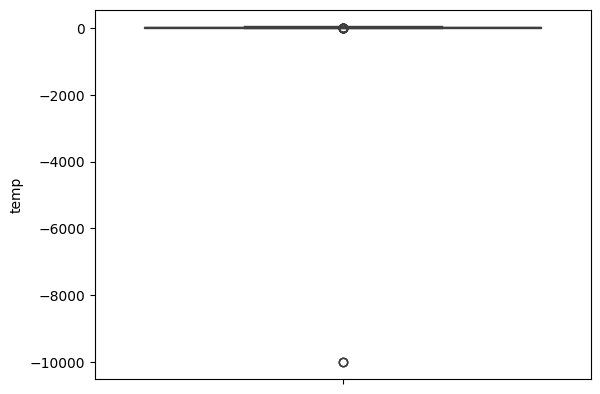

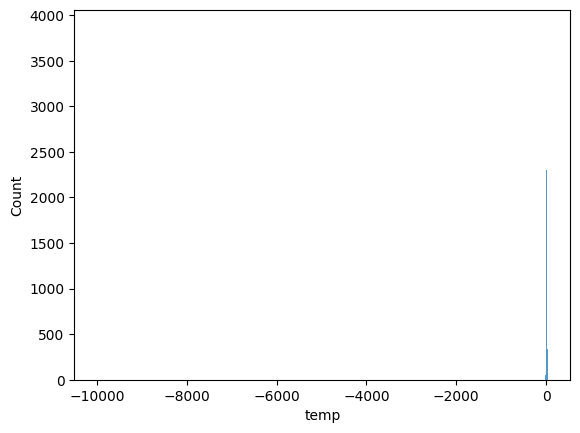

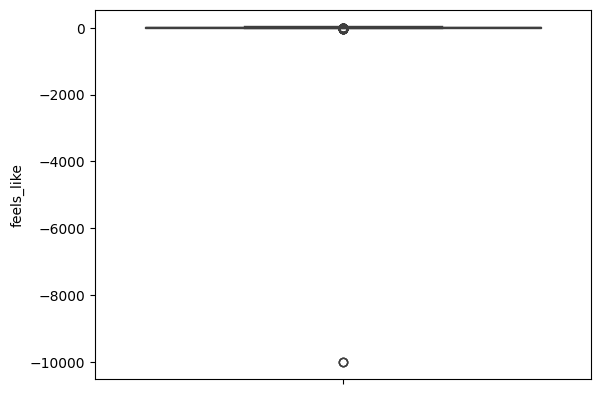

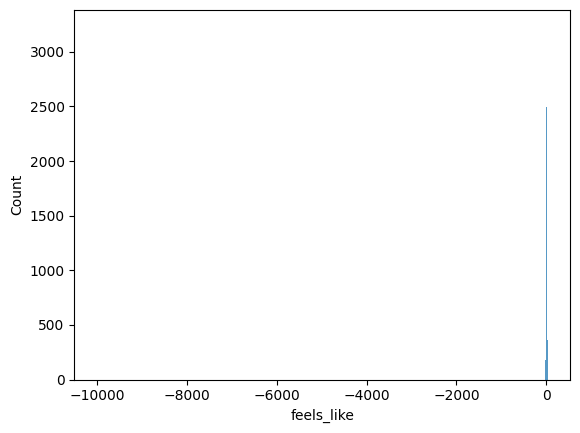

In [105]:
sns.boxplot(df['temp'])
plt.show()
sns.histplot(df['temp'])
plt.show()

sns.boxplot(df['feels_like'])
plt.show()

sns.histplot(df['feels_like'])
plt.show()


In [106]:
df['temp'].min(), df['temp'].max(), df['feels_like'].min(), df['feels_like'].max()

(np.float64(-9998.77),
 np.float64(37.61),
 np.float64(-10005.77),
 np.float64(37.74))

In [107]:
# physically unrealistic cutoff
outliers = df[(df['temp'] < -100) | (df['feels_like'] < -100)]
outliers

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
138339,1679324400,2023-03-20 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
138604,1680271200,2023-03-31 14:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-10005.77,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
138804,1680861600,2023-04-07 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d


The 3 records above showing error data in a specific coordinate. Their temperature and feels_like show obvious inappropriate value. Since there are only 3 records over more than 130 thousand of data point, we will go ahead to remove them as the simplest approach.

In [108]:
cleaned_df = cleaned_df.drop(outliers.index).copy()
cleaned_df

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00+00:00,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,NaN,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,NaN,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,NaN,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00+00:00,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,NaN,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00+00:00,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,NaN,...,100,701,Mist,mist,50n,4,1,1,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,12.61,10000.0,4.57,11.44,12.04,13.42,1019,NaN,...,0,800,Clear,sky is clear,01n,19,1,5,2023,0
139390,1682971200,2023-05-01 20:00:00+00:00,10.61,10000.0,5.58,9.58,9.85,11.83,1019,NaN,...,0,800,Clear,sky is clear,01n,20,1,5,2023,0
139391,1682974800,2023-05-01 21:00:00+00:00,10.07,10000.0,6.04,9.12,8.59,11.83,1019,NaN,...,0,800,Clear,sky is clear,01n,21,1,5,2023,0
139392,1682978400,2023-05-01 22:00:00+00:00,9.80,10000.0,6.70,9.80,7.48,11.83,1020,NaN,...,0,800,Clear,sky is clear,01n,22,1,5,2023,0


### Visibility

At first glance, the visibility data appears reasonable, ranging from a minimum of 49 meters to a maximum of 10,000 meters.  the latter typically indicating perfectly clear conditions with no significant obstructions.


In [109]:
df['visibility'].describe()

count    137498.000000
mean       8693.875169
std        2743.282608
min          49.000000
25%        9999.000000
50%       10000.000000
75%       10000.000000
max       10000.000000
Name: visibility, dtype: float64

<Axes: xlabel='visibility', ylabel='Count'>

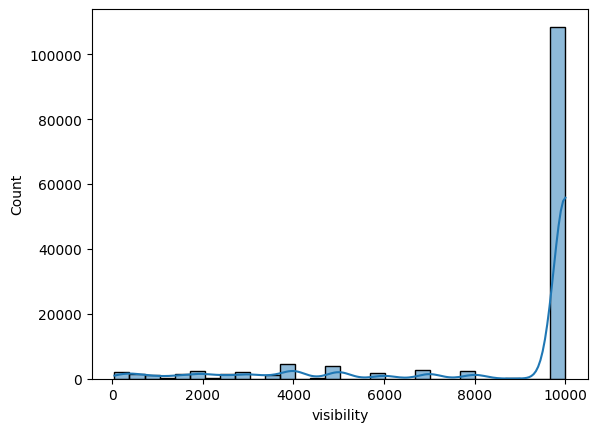

In [110]:
sns.histplot(df['visibility'], bins=30, kde=True)

### Dew point

In [111]:
attribute_dict['dew_point']

'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form'

There were 3 records with missing dew_point values, which also corresponded to temperature outliers. These records were identified as bad data and have been removed in cleaned_df.

In [112]:
df[df['dew_point'].isna()]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
138339,1679324400,2023-03-20 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
138604,1680271200,2023-03-31 14:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-10005.77,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
138804,1680861600,2023-04-07 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d


In [113]:
cleaned_df[cleaned_df['dew_point'].isna()]

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday


### Pressure

Looking at the describe() results of Pressure attribute, there must be outlier(s) that impact the visualisations. Scientifically, the pressure can never be lower than zero, we will simply remove the only record having this error.

In [114]:
outliers = df[df['pressure']< 0]
outliers

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
138339,1679324400,2023-03-20 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d


<Axes: xlabel='pressure', ylabel='Count'>

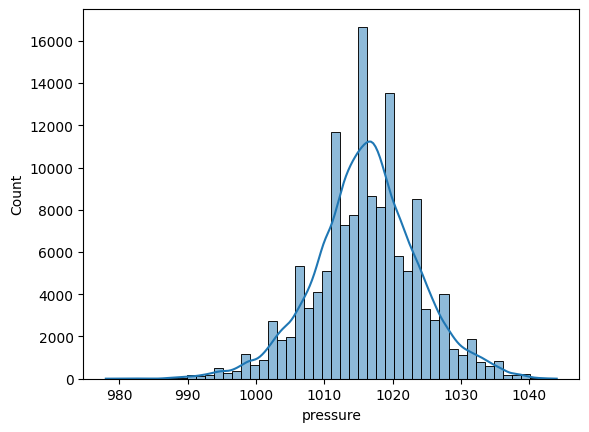

In [115]:
sns.histplot(df[df['pressure'] > 0]['pressure'], bins=50, kde=True)


In [116]:
try:
    cleaned_df = cleaned_df.drop(outliers.index, axis = 0).copy()
except:
    print('Already dropped')
cleaned_df

Already dropped


,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00+00:00,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,NaN,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,NaN,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,NaN,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00+00:00,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,NaN,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00+00:00,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,NaN,...,100,701,Mist,mist,50n,4,1,1,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,12.61,10000.0,4.57,11.44,12.04,13.42,1019,NaN,...,0,800,Clear,sky is clear,01n,19,1,5,2023,0
139390,1682971200,2023-05-01 20:00:00+00:00,10.61,10000.0,5.58,9.58,9.85,11.83,1019,NaN,...,0,800,Clear,sky is clear,01n,20,1,5,2023,0
139391,1682974800,2023-05-01 21:00:00+00:00,10.07,10000.0,6.04,9.12,8.59,11.83,1019,NaN,...,0,800,Clear,sky is clear,01n,21,1,5,2023,0
139392,1682978400,2023-05-01 22:00:00+00:00,9.80,10000.0,6.70,9.80,7.48,11.83,1020,NaN,...,0,800,Clear,sky is clear,01n,22,1,5,2023,0


### Sea Level and Grnd Level

There are two redundant attributes that having no records at all. They are also not being introduced in the attribute  description. Therefore, we will ignore and drop these 2 columns.

In [117]:
df['sea_level'].notna().sum(), df['grnd_level'].notna().sum()

(np.int64(0), np.int64(0))

In [118]:
cleaned_df = cleaned_df.drop(df[['sea_level', 'grnd_level']], axis = 1)
cleaned_df

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00+00:00,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,92,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,92,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,92,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00+00:00,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,92,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00+00:00,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,93,...,100,701,Mist,mist,50n,4,1,1,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,12.61,10000.0,4.57,11.44,12.04,13.42,1019,58,...,0,800,Clear,sky is clear,01n,19,1,5,2023,0
139390,1682971200,2023-05-01 20:00:00+00:00,10.61,10000.0,5.58,9.58,9.85,11.83,1019,71,...,0,800,Clear,sky is clear,01n,20,1,5,2023,0
139391,1682974800,2023-05-01 21:00:00+00:00,10.07,10000.0,6.04,9.12,8.59,11.83,1019,76,...,0,800,Clear,sky is clear,01n,21,1,5,2023,0
139392,1682978400,2023-05-01 22:00:00+00:00,9.80,10000.0,6.70,9.80,7.48,11.83,1020,81,...,0,800,Clear,sky is clear,01n,22,1,5,2023,0


### Humidity

The histogram of humidity appears normal, with no suspicious values. Therefore, we will retain the data as is for now.

<Axes: xlabel='humidity', ylabel='Count'>

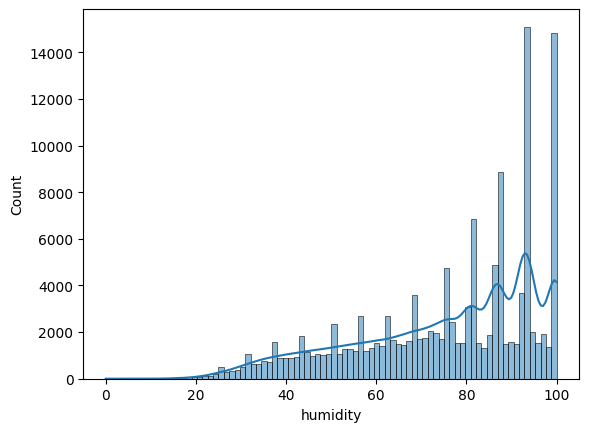

In [119]:
sns.histplot(df['humidity'], kde=True)

### Wind

In [120]:
# Calculate z-scores for a column
df['z_score'] = zscore(df['wind_speed'])

# Detect outliers where |z| > 3
outliers = df[np.abs(df['z_score']) > 3]
outliers

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,z_score
138804,1680861600,2023-04-07 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d,372.608356


In [121]:
try:
    cleaned_df.drop(outliers.index, axis = 1).copy()
except:
    print('Already cleared. ')
cleaned_df

Already cleared. 


,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00+00:00,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,92,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,92,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,92,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00+00:00,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,92,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00+00:00,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,93,...,100,701,Mist,mist,50n,4,1,1,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,12.61,10000.0,4.57,11.44,12.04,13.42,1019,58,...,0,800,Clear,sky is clear,01n,19,1,5,2023,0
139390,1682971200,2023-05-01 20:00:00+00:00,10.61,10000.0,5.58,9.58,9.85,11.83,1019,71,...,0,800,Clear,sky is clear,01n,20,1,5,2023,0
139391,1682974800,2023-05-01 21:00:00+00:00,10.07,10000.0,6.04,9.12,8.59,11.83,1019,76,...,0,800,Clear,sky is clear,01n,21,1,5,2023,0
139392,1682978400,2023-05-01 22:00:00+00:00,9.80,10000.0,6.70,9.80,7.48,11.83,1020,81,...,0,800,Clear,sky is clear,01n,22,1,5,2023,0


### Rain and Snow

For the raining and snowing amount, there are a few significantly high records compared to the quartile description. However, these can be valid outliers and we may preserve them for further investigation.

In [122]:
rain = df[(df['rain_1h'] > 15) | (df['rain_3h'] > 15)]
rain

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,z_score
4886,1216123200,2008-07-15 12:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,18.41,10000.0,15.28,18.45,...,NaN,20.0,NaN,NaN,75,502,Rain,heavy intensity rain,10d,0.097264
5074,1216782000,2008-07-23 03:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.18,10000.0,13.87,14.21,...,NaN,21.0,NaN,NaN,100,701,Mist,mist,50d,-0.014556
5075,1216782000,2008-07-23 03:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.18,10000.0,13.87,14.21,...,NaN,21.0,NaN,NaN,100,502,Rain,heavy intensity rain,10d,-0.014556
5077,1216789200,2008-07-23 05:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.12,4000.0,13.81,14.15,...,16.0,NaN,NaN,NaN,100,502,Rain,heavy intensity rain,10d,-0.014556
5078,1216792800,2008-07-23 06:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.31,4000.0,14.00,14.36,...,NaN,26.0,NaN,NaN,100,502,Rain,heavy intensity rain,10d,-0.014556
5092,1216843200,2008-07-23 20:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,15.26,10000.0,14.79,15.37,...,18.0,NaN,NaN,NaN,100,520,Rain,light intensity shower rain,09n,-0.051829
5093,1216846800,2008-07-23 21:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,15.15,10000.0,14.68,15.25,...,NaN,27.0,NaN,NaN,100,502,Rain,heavy intensity rain,10n,-0.051829
13421,1245769200,2009-06-23 15:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,17.16,10000.0,16.52,17.44,...,NaN,24.0,NaN,NaN,40,201,Thunderstorm,thunderstorm with rain,11d,-0.051829
13422,1245769200,2009-06-23 15:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,17.16,10000.0,16.52,17.44,...,NaN,24.0,NaN,NaN,40,502,Rain,heavy intensity rain,10d,-0.051829
22529,1276873200,2010-06-18 15:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,20.98,10000.0,20.98,21.74,...,NaN,20.0,NaN,NaN,75,201,Thunderstorm,thunderstorm with rain,11d,-0.014556


In [123]:
snow = df[(df['snow_1h'] > 2) | (df['snow_3h'] > 5)]
snow

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,z_score
8481,1228676400,2008-12-07 19:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.78,6000.0,1.78,-3.19,...,NaN,NaN,2.22,NaN,100,601,Snow,snow,13n,0.134538
8482,1228680000,2008-12-07 20:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.76,6000.0,1.76,-2.72,...,NaN,NaN,2.06,NaN,100,601,Snow,snow,13n,0.097264
8486,1228694400,2008-12-08 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.53,8000.0,1.53,-1.66,...,NaN,NaN,NaN,9.0,100,601,Snow,snow,13n,0.022718
10148,1234450800,2009-02-12 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.37,1800.0,0.23,0.37,...,NaN,NaN,NaN,6.0,100,701,Mist,mist,50d,-0.051829
10149,1234450800,2009-02-12 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.37,1800.0,0.23,0.37,...,NaN,NaN,NaN,6.0,100,601,Snow,snow,13d,-0.051829
10154,1234461600,2009-02-12 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.28,1500.0,-0.28,-0.28,...,NaN,NaN,NaN,6.0,100,701,Mist,mist,50n,-0.051829
10155,1234461600,2009-02-12 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.28,1500.0,-0.28,-0.28,...,NaN,NaN,NaN,6.0,100,601,Snow,snow,13n,-0.051829
11038,1237345200,2009-03-18 03:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.37,4000.0,0.66,1.37,...,NaN,NaN,NaN,7.0,100,601,Snow,snow,13n,-0.089103
19418,1266044400,2010-02-13 07:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.72,1000.0,0.72,-1.62,...,NaN,NaN,2.28,NaN,100,701,Mist,mist,50d,-0.014556
19419,1266044400,2010-02-13 07:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.72,1000.0,0.72,-1.62,...,NaN,NaN,2.28,NaN,100,612,Snow,light shower sleet,13d,-0.014556


### Clouds all

Cloudliness is in percentage and no value exceed the normal range.

<Axes: ylabel='clouds_all'>

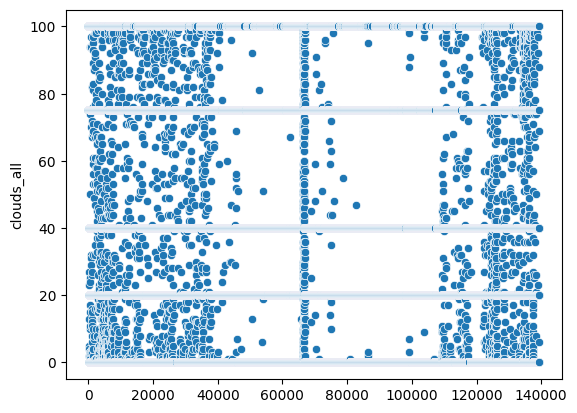

In [124]:
sns.scatterplot(df['clouds_all'])

### Weather ID

There are 34 unique IDs for weather icons.

In [125]:
pd.unique(df['weather_id'])


array([600, 804, 701, 601, 803, 741, 802, 801, 800, 500, 520, 612, 620,
       501, 300, 502, 201, 211, 521, 711, 621, 611, 202, 301, 721, 522,
       221, 200, 771, 761, 622, 321, 602, 615])

<Axes: xlabel='weather_id', ylabel='Count'>

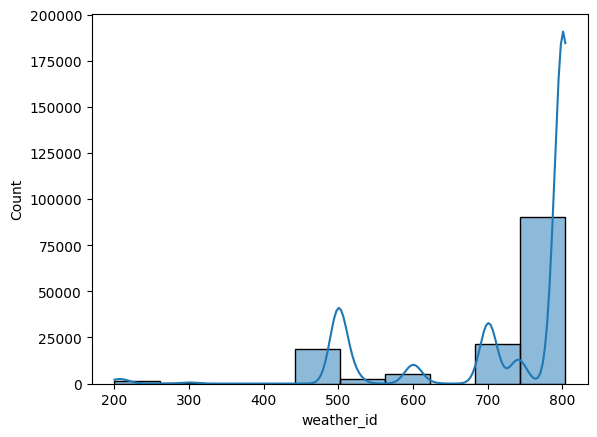

In [126]:
sns.histplot(df['weather_id'], bins=10, kde=True)

### Others

In [127]:
cleaned_df.describe()

,dt,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,...,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,hour,day,month,year,weekday
count,1.393910e+05,139391.000000,137498.000000,139391.000000,139391.000000,139391.000000,139391.000000,139391.000000,139391.000000,139391.000000,...,1847.000000,4572.000000,821.000000,139391.000000,139391.000000,139391.000000,139391.000000,139391.000000,139391.000000,139391.000000
mean,1.440546e+09,9.833593,8693.875169,5.084661,8.744696,8.542779,12.123035,1016.129671,75.659024,2.318812,...,1.859643,0.361105,0.908526,38.215423,728.713676,11.486645,15.747631,6.431412,2015.156043,2.999656
std,1.396591e+08,9.460105,2743.282608,7.568612,10.258701,9.541555,9.636087,7.612546,19.814327,1.694446,...,3.033603,0.300892,1.108691,38.417050,121.070980,6.933797,8.794107,3.496364,4.428039,2.000244
min,1.199146e+09,-23.020000,49.000000,-24.390000,-29.270000,-26.180000,-21.250000,978.000000,7.000000,0.000000,...,0.100000,0.100000,0.100000,0.000000,200.000000,0.000000,1.000000,1.000000,2008.000000,0.000000
25%,1.319535e+09,2.240000,9999.000000,-0.450000,0.690000,0.840000,4.700000,1012.000000,62.000000,1.030000,...,0.200000,0.160000,0.200000,0.000000,701.000000,5.000000,8.000000,3.000000,2011.000000,1.000000
50%,1.440342e+09,9.700000,10000.000000,5.150000,8.800000,8.450000,12.000000,1016.000000,81.000000,2.000000,...,0.800000,0.260000,0.500000,20.000000,800.000000,11.000000,16.000000,6.000000,2015.000000,3.000000
75%,1.561052e+09,16.910000,10000.000000,11.350000,16.700000,15.750000,19.400000,1021.000000,93.000000,3.100000,...,2.000000,0.450000,1.000000,75.000000,801.000000,18.000000,23.000000,10.000000,2019.000000,5.000000
max,1.682982e+09,37.610000,10000.000000,25.190000,37.740000,37.000000,42.700000,1044.000000,100.000000,18.000000,...,27.000000,2.280000,9.000000,100.000000,804.000000,23.000000,31.000000,12.000000,2023.000000,6.000000


In [128]:
cleaned_df.shape

(139391, 27)

## Weather ID

The dataset includes a weather_id field, but it does not correspond one-to-one with weather conditions. Instead, each weather category (weather_main) can be associated with one or more unique IDs. Being aware of this, we will use weather_main for building model.


In [129]:
cleaned_df.groupby('weather_main')['weather_id'].nunique()

weather_main
Clear           1
Clouds          4
Drizzle         3
Dust            1
Fog             1
Haze            1
Mist            1
Rain            6
Smoke           1
Snow            9
Squall          1
Thunderstorm    5
Name: weather_id, dtype: int64

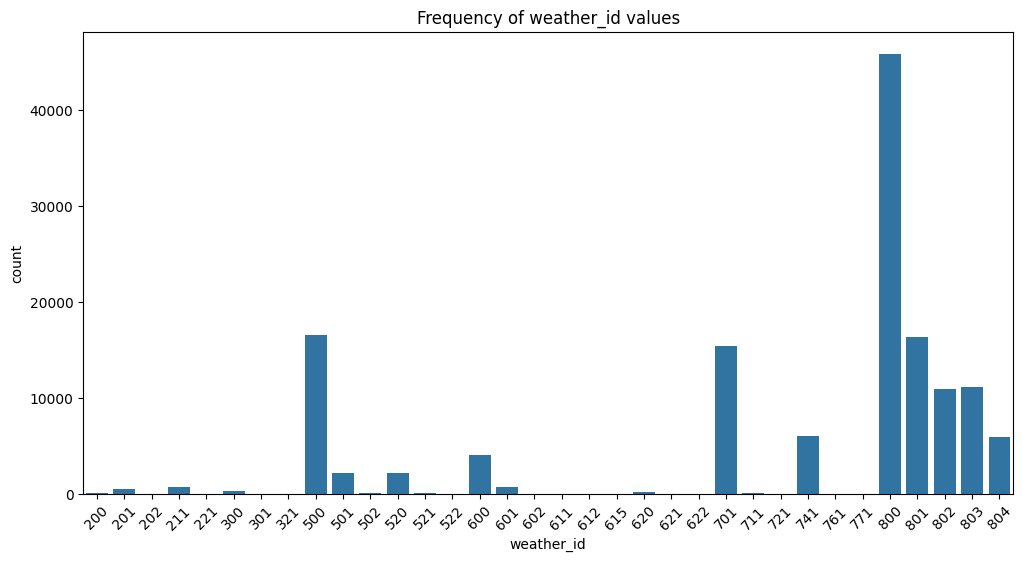

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='weather_id', data=cleaned_df)
plt.xticks(rotation=45)
plt.title("Frequency of weather_id values")
plt.show()


## Summary

- No missing value was dropped.
- Not yet found out the duplication reasons.
- Converted date time format.
- Sorted the dataframe by date time in ascending order.
- Dropped redundant location info.
- Dropped records with Temp, Feels-like, Dew_point, Pressure, Wind,  outliers
- Dropped Sea level and Grnd Level columns


## Feature Relationships

In [131]:
cleaned_df.columns

Index(['dt', 'dt_iso', 'temp', 'visibility', 'dew_point', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'hour', 'day', 'month', 'year', 'weekday'],
      dtype='object')

### Scatter plot

Below is an example of temperature values over time, which clearly follow a seasonal pattern, reflecting typical weather changes throughout the year.


<Axes: xlabel='dt_iso', ylabel='temp'>

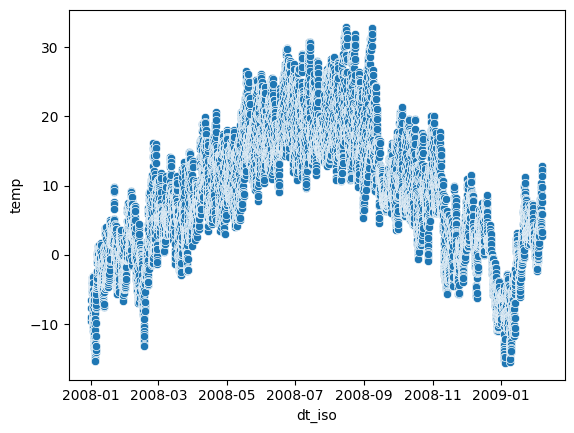

In [132]:
sns.scatterplot(x = cleaned_df['dt_iso'].head(10000), y = cleaned_df['temp'].head(10000))

### Correlation

To gaining insights into how different factors may influence each other, we generate a the correlation heatmap using Seaborn’s built-in function.

In [133]:
cleaned_df['dt_iso']

0        2008-01-01 00:00:00+00:00
1        2008-01-01 01:00:00+00:00
2        2008-01-01 02:00:00+00:00
3        2008-01-01 03:00:00+00:00
4        2008-01-01 04:00:00+00:00
                    ...           
139389   2023-05-01 19:00:00+00:00
139390   2023-05-01 20:00:00+00:00
139391   2023-05-01 21:00:00+00:00
139392   2023-05-01 22:00:00+00:00
139393   2023-05-01 23:00:00+00:00
Name: dt_iso, Length: 139391, dtype: datetime64[ns, UTC]

<Axes: >

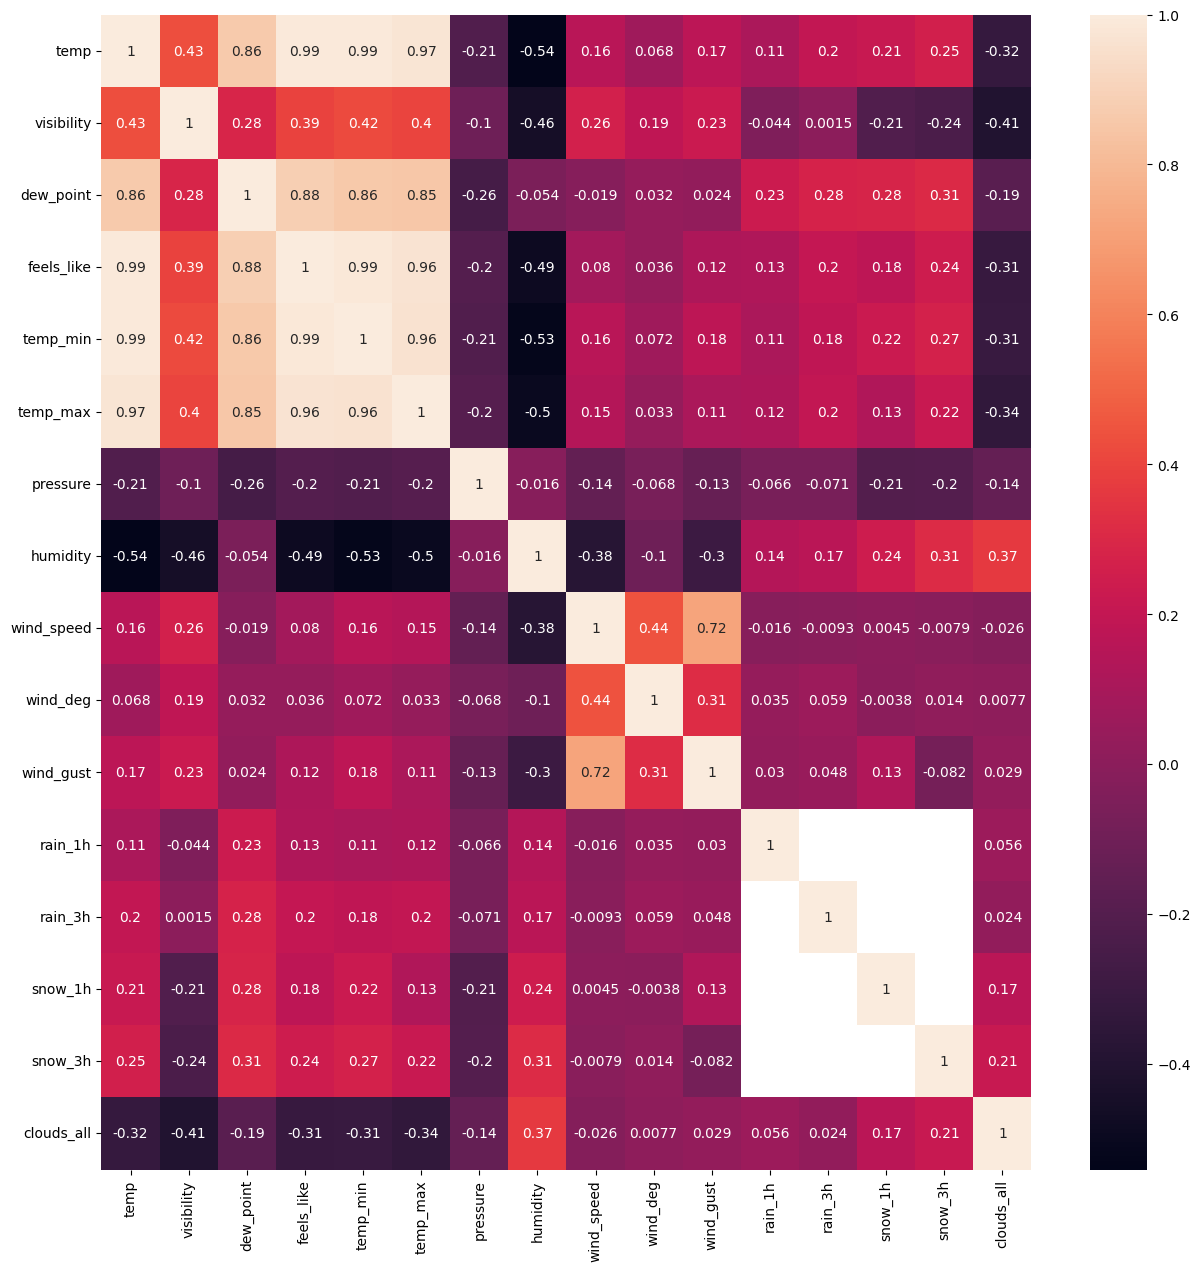

In [134]:
df_corr = cleaned_df[[ 'temp', 'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max', \
                      'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',\
                      'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all'\
                      ]].corr()
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True)

# Models

In this project, we will go with Supervised learning - which "is defined by its use of labelled datasets to train algorithms that to classify data or predict outcomes accurately."

In [135]:
cleaned_df.columns

Index(['dt', 'dt_iso', 'temp', 'visibility', 'dew_point', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'hour', 'day', 'month', 'year', 'weekday'],
      dtype='object')

In [136]:
cleaned_df.sample(20)

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
86715,1499626800,2017-07-09 19:00:00+00:00,20.02,10000.0,13.94,19.85,18.93,21.94,1017,68,...,0,800,Clear,sky is clear,01n,19,9,7,2017,6
122936,1625713200,2021-07-08 03:00:00+00:00,17.59,10000.0,16.61,17.86,16.79,17.70,1020,94,...,0,800,Clear,sky is clear,01d,3,8,7,2021,3
79855,1475816400,2016-10-07 05:00:00+00:00,4.72,9999.0,2.58,4.72,4.43,5.28,1016,86,...,75,803,Clouds,broken clouds,04d,5,7,10,2016,4
46427,1359486000,2013-01-29 19:00:00+00:00,-2.16,6000.0,-2.77,-6.62,-2.52,-2.05,1017,95,...,75,600,Snow,light snow,13n,19,29,1,2013,1
120374,1616583600,2021-03-24 11:00:00+00:00,3.79,9999.0,-9.80,0.63,3.08,4.87,1018,33,...,40,802,Clouds,scattered clouds,03d,11,24,3,2021,2
34647,1318842000,2011-10-17 09:00:00+00:00,4.96,10000.0,-2.72,2.46,3.75,6.19,1029,56,...,0,800,Clear,sky is clear,01d,9,17,10,2011,0
68127,1434740400,2015-06-19 19:00:00+00:00,18.78,10000.0,12.76,18.49,15.84,22.50,1010,68,...,0,800,Clear,sky is clear,01n,19,19,6,2015,4
2910,1209232800,2008-04-26 18:00:00+00:00,12.53,10000.0,-2.56,10.73,10.77,13.85,1023,34,...,40,802,Clouds,scattered clouds,03n,18,26,4,2008,5
80826,1479124800,2016-11-14 12:00:00+00:00,1.61,9999.0,-3.06,-2.69,0.87,2.63,1030,69,...,20,801,Clouds,few clouds,02d,12,14,11,2016,0
130050,1650189600,2022-04-17 10:00:00+00:00,6.81,10000.0,-2.79,4.30,5.79,6.92,1020,49,...,100,804,Clouds,overcast clouds,04d,10,17,4,2022,6


In [137]:
cleaned_df['weather_main'].unique()

array(['Snow', 'Clouds', 'Mist', 'Fog', 'Clear', 'Rain', 'Drizzle',
       'Thunderstorm', 'Smoke', 'Haze', 'Squall', 'Dust'], dtype=object)

## Linear Regression

We'll begin with the most fundamental machine learning model—Linear Regression. Since this model isn't designed to handle complex patterns, we'll apply it to predict the most straightforward relationship: the one between actual temperature (feature) and 'feels-like' temperature (target).


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
# Determine X and y
X = cleaned_df['temp'].values.reshape(-1, 1)
y = cleaned_df['feels_like'].values  # 1D target is fine

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

# Training
model = LinearRegression()
model_name = type(model).__name__
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': [model_name],
    'Accuracy': [model.score(X_test, y_test)],
    'MSE': [mean_squared_error(y_test, y_pred)],
    'MAE': [mean_absolute_error(y_test, y_pred)],
    'RMSE': [r2_score(y_test, y_pred)]
})

results_df

,Model,Accuracy,MSE,MAE,RMSE
0,LinearRegression,0.984978,1.578061,0.942388,0.984978


The model predicts feels-like temperature from real temperature very accurately, with most predictions within about 1 degree of the actual value, and explaining nearly all the variance. This suggests a strong linear relationship between these two variables.

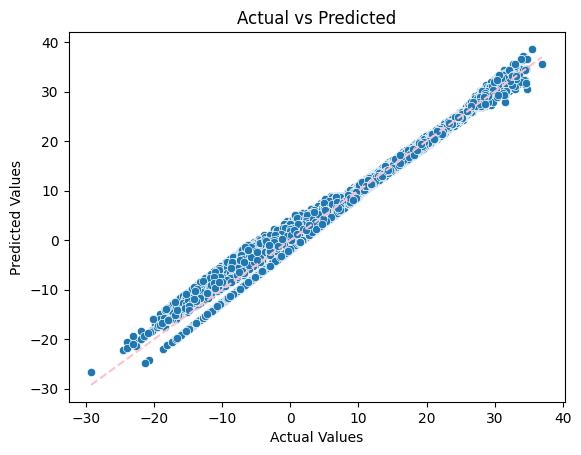

In [140]:
# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot of Actual vs Predicted
sns.scatterplot(data=df_plot, x='Actual', y='Predicted')

# Add a diagonal line for perfect prediction
# If predictions are perfect, all points would fall on a straight line (y = x).
plt.plot([df_plot.Actual.min(), df_plot.Actual.max()],
         [df_plot.Actual.min(), df_plot.Actual.max()],
         color='pink', linestyle='--')

plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Overprediction (points above the line)
# Underprediction (points below the line)
# Bias or clustering patterns
plt.show()


## K-nearest Regression

Apply K-nearest Regression to classify weather conditions based on most other attributes.

In [141]:
# print(df['weather_main'].value_counts())
# # Replace the specified classes with 'Other'
# modelling_df['weather_main'] = cleaned_df['weather_main'].replace(['Haze', 'Dust', 'Squall'], 'Other')
# le = LabelEncoder()
# y_encoded = le.fit_transform(df['weather_main'])
# print(cleaned_df['weather_main'].value_counts())


In [142]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# import matplotlib.pyplot as plt
#
# # 1. Combine rare classes into 'Other'
# cleaned_df['weather_main'] = cleaned_df['weather_main'].replace(['Haze', 'Dust', 'Squall'], 'Other')
#
# # 2. Features and target
# features = [
#     'temp', 'humidity', 'wind_speed', 'pressure', 'dew_point',
#     'clouds_all', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
#     'visibility', 'hour', 'day', 'month', 'year', 'weekday'
# ]
# target = 'weather_main'
#
# X = cleaned_df[features].fillna(0)
# y = cleaned_df[target]
#
# # 3. Encode labels
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)
#
# # 4. Scale features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
#
# # 5. Split dataset
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y_encoded, test_size=0.2, random_state=14, stratify=y_encoded
# )
#
# # 🔍 6. Find optimal k
# k_range = range(1, 51)
# scores = []
#
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Use distance weighting
#     knn.fit(X_train, y_train)
#     scores.append(knn.score(X_test, y_test))
#
# # Plot k vs accuracy
# plt.plot(k_range, scores, marker='o')
# plt.xlabel('Number of Neighbors (k)')
# plt.ylabel('Accuracy')
# plt.title('KNN Accuracy for Different k')
# plt.grid(True)
# plt.show()
#
# # 7. Use best k
# best_k = k_range[scores.index(max(scores))]
# print(f"Best k found: {best_k}")
#
# # 8. Final model with best k
# knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
#
# # 9. Evaluate
# print("\nClassification Report:")
# classification_report(y_test, y_pred, target_names=le.classes_)


## Decision Trees

**Problem Statement:**  Classify the weather condition using the `weather_main` attribute based on various meteorological features.

#### Import libraries

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#### Define features and target

Overall, most features appear relevant for weather classification. Therefore, we will include them as model inputs, excluding attributes like weather_description and weather_icon, which do not contribute meaningful value.


In [144]:
print(cleaned_df.columns)
attribute_dict

Index(['dt', 'dt_iso', 'temp', 'visibility', 'dew_point', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'hour', 'day', 'month', 'year', 'weekday'],
      dtype='object')


{'dt': 'Time of data calculation, unix, UTC',
 'dt_iso': 'Date and time in UTC format',
 'timezone': 'Shift in seconds from UTC',
 'city_name': 'City name',
 'lat': 'Geographical coordinates of the location (latitude)',
 'lon': 'Geographical coordinates of the location (longitude)',
 'temp': 'Temperature',
 'visibility': 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.',
 'dew_point': 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form',
 'feels_like': 'This temperature parameter accounts for the human perception of weather',
 'temp_min': 'Minimum temperature at the moment (optional)',
 'temp_max': 'Maximum temperature at the moment (optional)',
 'pressure': 'N/A',
 'sea_level': 'N/A',
 'grnd_level': 'N/A',
 'humidity': 'Humidity, %',


Our target is weather_main with 12 unique weather conditions.

However, there are three weather conditions having significantly few records, making it difficult for the model to learn and predict them effectively. To address this, we grouped them under a common category labeled 'Other'.

Additionally, the Decision Trees cannot handle text or string categories directly.Instead, they require numerical values to perform splits (e.g., weather_main = 600, not 'Clouds'). Therfore, we generally need to encode categorical variables using `LabelEncoder` from `sklearn` library, but not necessarily scale or normalize them.

In [145]:
cleaned_df['weather_main'].value_counts()

weather_main
Clear           45888
Clouds          44423
Rain            21044
Mist            15401
Fog              6075
Snow             4967
Thunderstorm     1272
Drizzle           273
Smoke              43
Haze                2
Dust                2
Squall              1
Name: count, dtype: int64

In [146]:
# Combine rare classes into 'Other'
modelling_df = cleaned_df.copy()
modelling_df['weather_main'] = modelling_df['weather_main'].replace(['Haze', 'Dust', 'Squall'], 'Other')

# Feature and target selection
features = [
    'temp', 'humidity', 'wind_speed', 'pressure', 'dew_point',
    'clouds_all', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
    'visibility', 'hour', 'day', 'month', 'year', 'weekday'
]
target = 'weather_main'

X = modelling_df[features]
y = modelling_df[target]

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [147]:
# Double check features
X.sample(5)

,temp,humidity,wind_speed,pressure,dew_point,clouds_all,rain_1h,rain_3h,snow_1h,snow_3h,visibility,hour,day,month,year,weekday
35545,-3.85,100,1.0,1029,-3.85,100,NaN,NaN,NaN,NaN,3000.0,0,23,11,2011,2
6048,19.42,44,1.0,1022,6.87,5,NaN,NaN,NaN,NaN,10000.0,11,31,8,2008,6
81345,-2.21,73,0.0,1030,-5.92,0,NaN,NaN,NaN,NaN,10000.0,9,4,12,2016,6
91399,-3.28,68,2.6,1030,-7.77,100,NaN,NaN,NaN,NaN,9999.0,23,13,1,2018,5
7585,11.96,78,1.0,1017,8.25,40,NaN,NaN,NaN,NaN,10000.0,23,1,11,2008,5


In [148]:
# View encoded target values
list(zip(le.classes_, le.transform(le.classes_)))

[('Clear', np.int64(0)),
 ('Clouds', np.int64(1)),
 ('Drizzle', np.int64(2)),
 ('Fog', np.int64(3)),
 ('Mist', np.int64(4)),
 ('Other', np.int64(5)),
 ('Rain', np.int64(6)),
 ('Smoke', np.int64(7)),
 ('Snow', np.int64(8)),
 ('Thunderstorm', np.int64(9))]

#### Build model

In [149]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=14, stratify=y_encoded
)

# 6. Initialize and train the Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=14)
tree.fit(X_train, y_train)

# 7. Predict
y_pred = tree.predict(X_test)

#### Evaluate model

In [150]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

Classification Report:
              precision    recall  f1-score   support

       Clear       0.99      0.98      0.99      9178
      Clouds       0.93      0.92      0.92      8885
     Drizzle       0.01      0.02      0.01        55
         Fog       0.63      0.67      0.65      1215
        Mist       0.63      0.65      0.64      3080
       Other       0.00      0.00      0.00         1
        Rain       0.83      0.83      0.83      4209
       Smoke       0.00      0.00      0.00         9
        Snow       0.42      0.40      0.41       993
Thunderstorm       0.08      0.09      0.08       254

    accuracy                           0.86     27879
   macro avg       0.45      0.46      0.45     27879
weighted avg       0.86      0.86      0.86     27879



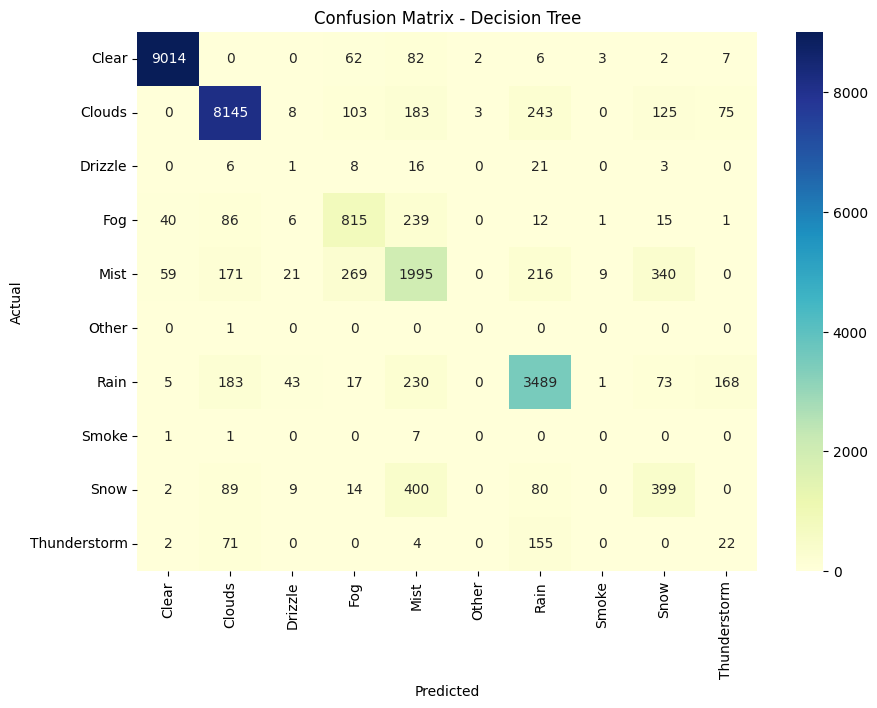

In [151]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='YlGnBu')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

Explanation: Random Forest is an ensemble learning method that constructs a multitude of decision trees at training time and outputs the mean prediction (for regression) of the individual trees. It addresses the overfitting problem often associated with single decision trees and generally provides higher accuracy and better generalization. It introduces randomness by bootstrapping samples and random subset of features for each tree.

Why it suits better: As an ensemble of Decision Trees, Random Forest inherits the ability to model non-linear relationships while significantly reducing variance and improving robustness. It's highly effective for complex datasets with many features and interactions, which is typical
for weather data. It also provides feature importance, which can be valuable for understanding the underlying drivers of weather patterns.

### References
https://link.springer.com/chapter/10.1007/978-981-16-2164-2_19

https://pdfs.semanticscholar.org/4e47/50e8ed593a8a08c6de47525cddec4f9de678.pdf

In [152]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# # 1. Combine rare classes
# cleaned_df['weather_main'] = cleaned_df['weather_main'].replace(['Haze', 'Dust', 'Squall'], 'Other')
#
# # 2. Features and target
# features = [
#     'temp', 'humidity', 'wind_speed', 'pressure', 'dew_point',
#     'clouds_all', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
#     'visibility', 'hour', 'day', 'month', 'year', 'weekday'
# ]
# target = 'weather_main'
#
# X = cleaned_df[features].fillna(0)
# y = cleaned_df[target]
#
# # 3. Encode target
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)
#
# # 4. Feature scaling (optional for tree models, but okay to leave in)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
#
# # 5. Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y_encoded, test_size=0.2, random_state=14, stratify=y_encoded
# )
#
# # 6. Initialize and train Random Forest
# rf = RandomForestClassifier(n_estimators=100, random_state=14)
# rf.fit(X_train, y_train)
#
# # 7. Predict
# y_pred = rf.predict(X_test)
#
# # 8. Evaluate
# print("Classification Report:")
# print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))
#
# # 9. Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greens')
# plt.title('Confusion Matrix - Random Forest')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


## Esemble Learning

Classification Report (Voting Classifier):
              precision    recall  f1-score   support

       Clear       0.96      1.00      0.98      9178
      Clouds       0.91      0.98      0.94      8885
     Drizzle       0.12      0.04      0.06        55
         Fog       0.76      0.61      0.67      1215
        Mist       0.70      0.69      0.70      3080
       Other       0.00      0.00      0.00         1
        Rain       0.91      0.85      0.88      4209
       Smoke       0.00      0.00      0.00         9
        Snow       0.58      0.48      0.52       993
Thunderstorm       0.16      0.01      0.02       254

    accuracy                           0.89     27879
   macro avg       0.51      0.47      0.48     27879
weighted avg       0.88      0.89      0.88     27879



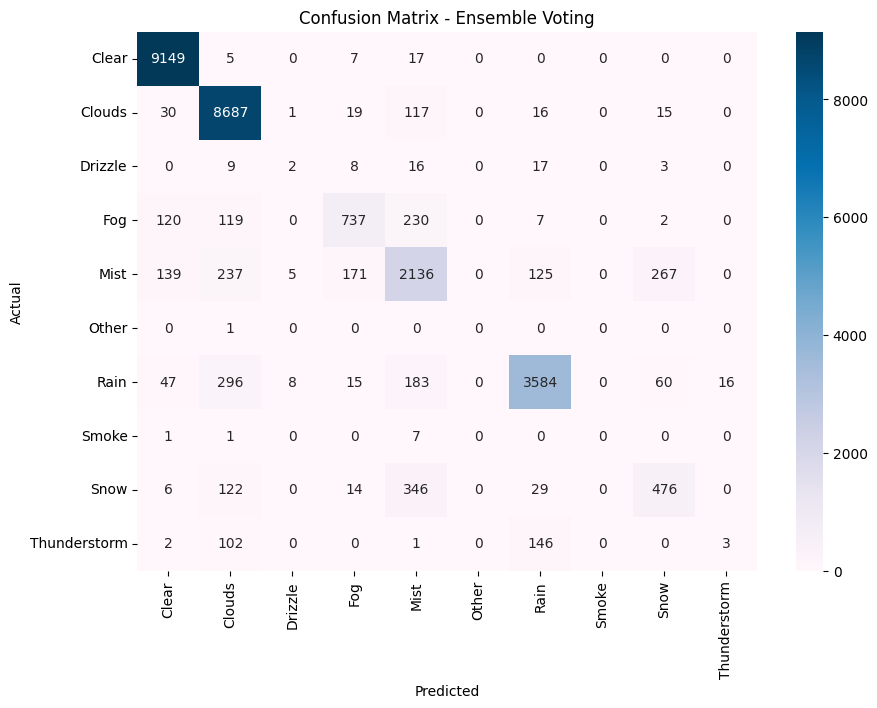

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Combine rare classes
cleaned_df['weather_main'] = cleaned_df['weather_main'].replace(['Haze', 'Dust', 'Squall'], 'Other')

# 2. Features and target
features = [
    'temp', 'humidity', 'wind_speed', 'pressure', 'dew_point',
    'clouds_all', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
    'visibility', 'hour', 'day', 'month', 'year', 'weekday'
]
target = 'weather_main'

X = cleaned_df[features].fillna(0)
y = cleaned_df[target]

# 3. Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=14, stratify=y_encoded
)

# 6. Define base models
log_clf = LogisticRegression(max_iter=1000, random_state=14)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=14)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# 7. Create ensemble model using Voting
ensemble_model = VotingClassifier(
    estimators=[
        ('logreg', log_clf),
        ('rf', rf_clf),
        ('knn', knn_clf)
    ],
    voting='hard'  # or 'soft' for probability-based
)

# 8. Train ensemble model
ensemble_model.fit(X_train, y_train)

# 9. Predict
y_pred = ensemble_model.predict(X_test)

# 10. Evaluation
print("Classification Report (Voting Classifier):")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

# 11. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='PuBu')
plt.title('Confusion Matrix - Ensemble Voting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Deep Learning

Epoch 1/30


d:\Master\Python and advacned data science\weather_venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2788/2788 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7291 - loss: 0.8180 - val_accuracy: 0.8847 - val_loss: 0.3697
Epoch 2/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8734 - loss: 0.3972 - val_accuracy: 0.8892 - val_loss: 0.3428
Epoch 3/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8866 - loss: 0.3637 - val_accuracy: 0.8996 - val_loss: 0.3259
Epoch 4/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8927 - loss: 0.3452 - val_accuracy: 0.9019 - val_loss: 0.3178
Epoch 5/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8921 - loss: 0.3410 - val_accuracy: 0.9023 - val_loss: 0.3098
Epoch 6/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8963 - loss: 0.3284 - val_accuracy: 0.9015 - val_loss: 0.3091
Epoch 7/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8963 - loss: 0.3246 - val_accuracy: 0.9037 - val_loss: 0.3025
Epoch 8/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8972 - loss: 0.3229 - val_accura

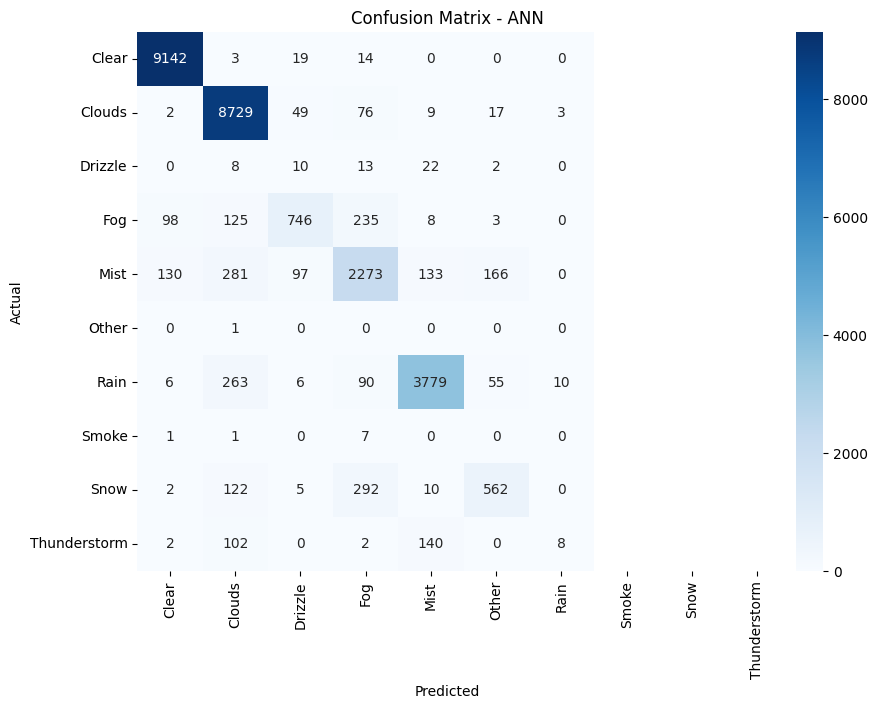

In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Combine rare classes
cleaned_df['weather_main'] = cleaned_df['weather_main'].replace(['Haze', 'Dust', 'Squall'], 'Other')

# 2. Feature and target
features = [
    'temp', 'humidity', 'wind_speed', 'pressure', 'dew_point',
    'clouds_all', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
    'visibility', 'hour', 'day', 'month', 'year', 'weekday'
]
target = 'weather_main'

X = cleaned_df[features].fillna(0)
y = cleaned_df[target]

# 3. Encode target to one-hot format
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# 4. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=14, stratify=y_encoded
)

# 6. Build ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# 7. Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 8. Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# 9. Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# 10. Predict and report
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=le.classes_, zero_division=0))

# 11. Confusion Matrix
cm = pd.crosstab(y_true_labels, y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Prediction models based on weather ID- more specific
To build more specific prediction models based on `weather_id`, we can treat `weather_id` as the target variable and use the same set of meteorological features as inputs. This approach allows us to predict not just the general weather condition (`weather_main`), but the exact weather code, which can capture more granular weather phenomena.

- **Feature selection:** Use the same features as before (temperature, humidity, wind, pressure, etc.).
- **Target:** `weather_id` (integer codes representing specific weather events).
- **Considerations:** Since `weather_id` is more granular, ensure there are enough samples for each class, or consider grouping rare codes.
-**Fine tuning**: Fine tune the model to increase accuracy
This approach enables more detailed weather event prediction, which can be valuable for applications needing fine-grained weather information.


## Decision Tree

In [158]:
# Create a mapping from weather_id to weather_description
id_description_map = (
    cleaned_df[['weather_id', 'weather_description']]
    .drop_duplicates()
    .sort_values(by='weather_id')
    .set_index('weather_id')['weather_description']
    .to_dict()
)

# Display mapping
for k, v in id_description_map.items():
    print(f"{k}: {v}")
# Drop unnecessary columns for modelling to prevent leakage
# 'weather_description' and 'weather_icon' are not needed for the model
modelling_df = cleaned_df.drop(columns=['weather_description', 'weather_icon']).copy()
# Check the distribution of weather_id
modelling_df['weather_id'].value_counts()


200: thunderstorm with light rain
201: thunderstorm with rain
202: thunderstorm with heavy rain
211: thunderstorm
221: ragged thunderstorm
300: light intensity drizzle
301: drizzle
321: shower drizzle
500: light rain
501: moderate rain
502: heavy intensity rain
520: light intensity shower rain
521: proximity shower rain
522: heavy intensity shower rain
600: light snow
601: snow
602: heavy snow
611: sleet
612: light shower sleet
615: light rain and snow
620: light shower snow
621: shower snow
622: heavy shower snow
701: mist
711: smoke
721: haze
741: fog
761: dust
771: proximity squalls
800: sky is clear
801: few clouds
802: scattered clouds
803: broken clouds
804: overcast clouds


weather_id
800    45888
500    16556
801    16373
701    15401
803    11175
802    10973
741     6075
804     5902
600     4004
501     2132
520     2125
211      752
601      725
201      458
300      265
620      189
502      116
521      112
200       50
711       43
621       25
612       18
202       11
301        7
522        3
611        2
721        2
761        2
602        2
221        1
771        1
622        1
321        1
615        1
Name: count, dtype: int64

###  Handling Class Imbalance

To improve model performance and avoid bias toward common classes, we filter the dataset to include only those `weather_id` values that appear at least **200 times**.

This reduces noise from underrepresented classes and improves classifier generalization.




In [164]:
#  Filter weather_ids with at least 500 samples
min_count = 200
valid_ids = modelling_df['weather_id'].value_counts()
valid_ids = valid_ids[valid_ids >= min_count].index.tolist()

# Filter the dataframe
filtered_df = modelling_df[modelling_df['weather_id'].isin(valid_ids)].copy()

#  Define features and target
features = [
    'temp', 'humidity', 'wind_speed', 'pressure', 'dew_point',
    'clouds_all', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
    'visibility', 'hour', 'day', 'month', 'year', 'weekday'
]
X = filtered_df[features].fillna(0)
y = filtered_df['weather_id']


###  Training the Decision Tree on Filtered Weather IDs

With the cleaned and balanced dataset, we now:
- Split the data into train and test sets (80/20),
- Train a `DecisionTreeClassifier`,
- Evaluate its performance using accuracy, classification report, and a confusion matrix.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print class distribution in the split
print("Training set class distribution:")
print(y_train.value_counts(), "\n")

print("Test set class distribution:")
print(y_test.value_counts())

# Train the Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict
y_pred = tree_model.predict(X_test)

# Recover the order of class labels used in the model for the confusion matrix
class_labels = sorted(y.unique())  # from your filtered_df['weather_id']
for i, val in enumerate(class_labels):
    print(f"{i}: {val} → {id_description_map[val]}")



Training set class distribution:
weather_id
800    36710
500    13245
801    13098
701    12321
803     8940
802     8778
741     4860
804     4722
600     3203
501     1706
520     1700
211      602
601      580
201      366
300      212
Name: count, dtype: int64 

Test set class distribution:
weather_id
800    9178
500    3311
801    3275
701    3080
803    2235
802    2195
741    1215
804    1180
600     801
501     426
520     425
211     150
601     145
201      92
300      53
Name: count, dtype: int64
0: 201 → thunderstorm with rain
1: 211 → thunderstorm
2: 300 → light intensity drizzle
3: 500 → light rain
4: 501 → moderate rain
5: 520 → light intensity shower rain
6: 600 → light snow
7: 601 → snow
8: 701 → mist
9: 741 → fog
10: 800 → sky is clear
11: 801 → few clouds
12: 802 → scattered clouds
13: 803 → broken clouds
14: 804 → overcast clouds


###  Model Evaluation

As before we evaluate the classifier using:
- **Accuracy**: overall performance
- **Classification Report**: precision, recall, F1-score per class
- **Confusion Matrix**: visualize prediction errors across classes



Model Accuracy: 0.8433

Classification Report:
              precision    recall  f1-score   support

         201       0.04      0.05      0.05        92
         211       0.05      0.07      0.06       150
         300       0.08      0.13      0.10        53
         500       0.78      0.77      0.77      3311
         501       0.75      0.73      0.74       426
         520       0.18      0.19      0.18       425
         600       0.43      0.48      0.45       801
         601       0.32      0.32      0.32       145
         701       0.66      0.64      0.65      3080
         741       0.66      0.67      0.66      1215
         800       0.99      0.98      0.99      9178
         801       0.97      0.96      0.96      3275
         802       0.94      0.92      0.93      2195
         803       0.92      0.92      0.92      2235
         804       0.84      0.84      0.84      1180

    accuracy                           0.84     27761
   macro avg       0.57      0.5

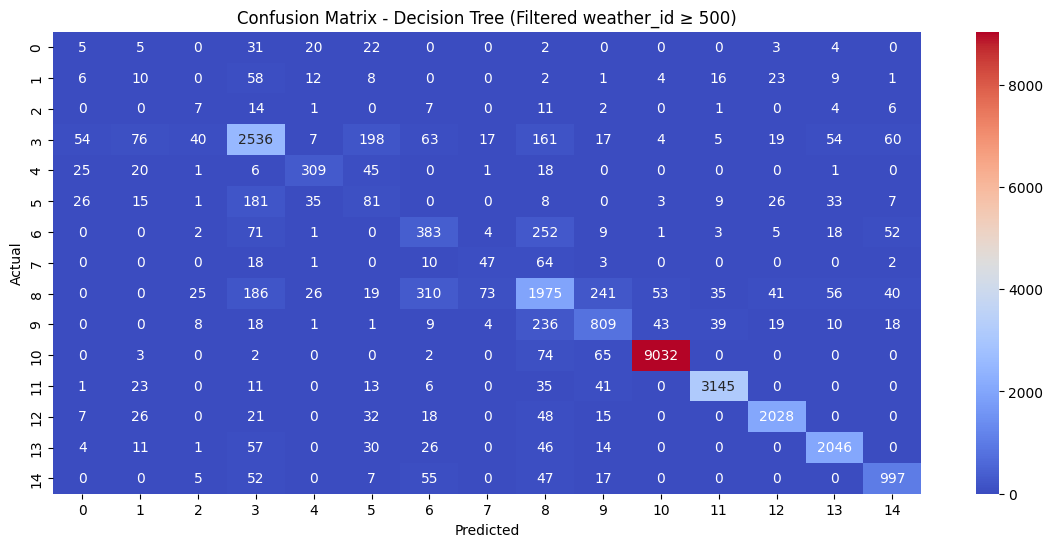

In [166]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Decision Tree (Filtered weather_id ≥ 500)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Conclusion:**
 This model includes more weather types (15 classes), which makes it more realistic but harder to classify accurately.
Accuracy: 84.33%
Macro F1: 0.57 (treats all classes equally)
Weighted F1: 0.85 (favors common classes like clear sky)
The model did really well on common weather like:
Clear sky (800) and clouds (801–804) with F1-scores above 0.90
But it struggled on rare ones:
Thunderstorm (201, 211) and drizzle (300) had F1-scores below 0.10
####  Improve the Decision Tree Accuracy
 One method we applied was to **filter out weather_id classes with fewer than 200 samples**. This reduced class imbalance and improved the model’s overall performance.
- **Accuracy increased to ~84%** after applying the filter
- The model became more stable and made fewer mistakes on frequent classes
Other possible improvements (not covered yet to avoid redundancy) include:
- Tuning hyperparameters (max depth, min samples per leaf)
- Using ensemble methods 
- Applying class weights instead of removing rare classes

In our case, we focused on class filtering as a simple and effective method to boost accuracy.


## Logistic Regression – Predicting Weather ID

We use Logistic Regression to predict `weather_id` values from weather and time-related features.
Since `weather_id` is a multi-class target, we use **multinomial logistic regression** with softmax and apply scaling to help the model converge.


In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Use the same filtered_df from before (weather_id ≥ 200)
X = filtered_df[features].fillna(0)
y = filtered_df['weather_id']

# Scale the features so they are all in the same range
# This helps the model converge faster and perform better
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


#### Model Training
We use `multi_class='multinomial'` and `solver='lbfgs'` to support multiple classes.


d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8255826519217607

Classification Report:
              precision    recall  f1-score   support

         201       0.32      0.11      0.16        92
         211       0.40      0.01      0.03       150
         300       0.00      0.00      0.00        53
         500       0.80      0.82      0.81      3311
         501       0.72      0.55      0.63       426
         520       0.14      0.02      0.04       425
         600       0.53      0.39      0.45       801
         601       0.52      0.38      0.44       145
         701       0.50      0.57      0.53      3080
         741       0.51      0.41      0.45      1215
         800       0.96      0.99      0.97      9178
         801       0.96      0.96      0.96      3275
         802       0.93      0.90      0.91      2195
         803       0.89      0.91      0.90      2235
         804       0.69      0.91      0.79      1180

    accuracy                           0.83     27761
   macro avg       0.59    

d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

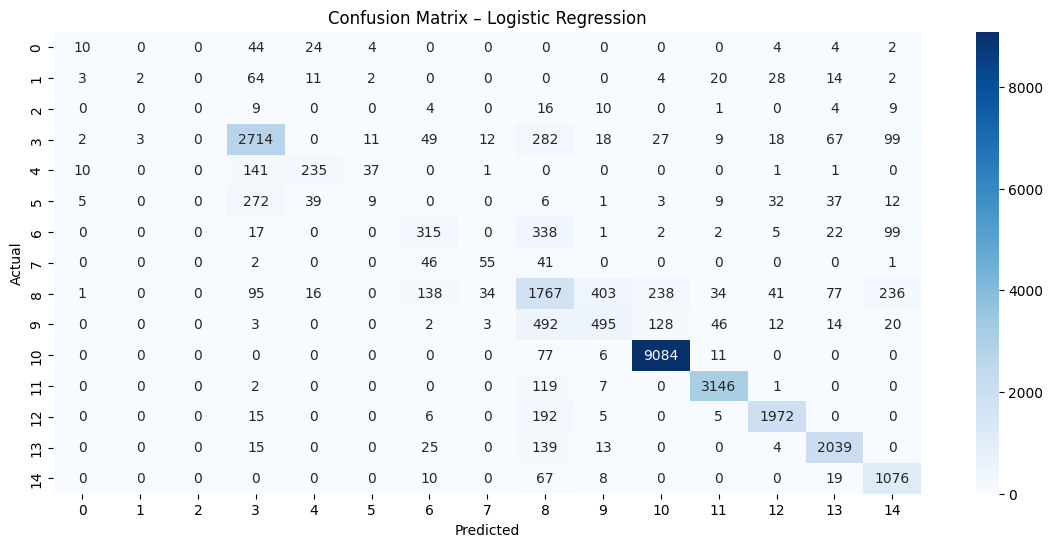

In [175]:
# Train logistic regression
# Initialize the logistic regression model
# - multi_class='multinomial' allows handling multiple classes (not just binary)
# - solver='lbfgs' is an efficient optimizer that supports multinomial loss
# - max_iter=1000 ensures the solver has enough iterations to converge
# - random_state=42 ensures reproducibility of the results
log_model = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42
)
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Hyperparameter Tuning – Grid Search
We tune the regularization strength (`C`) to see if performance improves. Smaller `C` means stronger regularization.


In [176]:
from sklearn.model_selection import GridSearchCV
# Define a dictionary of hyperparameters to test.
# 'C' is the regularization strength. Lower values = stronger regularization.
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}
# Set up the GridSearchCV
# - LogisticRegression with multinomial (multi-class) setup
# - solver 'lbfgs' is efficient and works with multinomial loss
# - max_iter=1000 ensures it has enough iterations to converge
# - cv=3 means 3-fold cross-validation (split train set into 3 parts)
# - scoring='accuracy' tells GridSearch to optimize for classification accuracy
# - n_jobs=-1 uses all available cores (faster)
grid = GridSearchCV(
    LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)

# Best params
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Evaluate tuned model
best_log_model = grid.best_estimator_
y_pred_tuned = best_log_model.predict(X_test)

print("Accuracy before tuning:", accuracy_score(y_test, y_pred))
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report (Tuned):")
print(classification_report(y_test, y_pred_tuned))


d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 10}
Best CV Score: 0.8263555840688737
Accuracy before tuning: 0.8255826519217607
Tuned Accuracy: 0.8262670653074456

Classification Report (Tuned):
              precision    recall  f1-score   support

         201       0.35      0.15      0.21        92
         211       0.29      0.01      0.03       150
         300       0.00      0.00      0.00        53
         500       0.80      0.82      0.81      3311
         501       0.73      0.56      0.64       426
         520       0.15      0.02      0.04       425
         600       0.53      0.40      0.45       801
         601       0.52      0.37      0.43       145
         701       0.50      0.57      0.53      3080
         741       0.51      0.41      0.45      1215
         800       0.96      0.99      0.97      9178
         801       0.96      0.96      0.96      3275
         802       0.93      0.90      0.91      2195
         803       0.89      0.91      0.90      2235
         804      

d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

#### Logistic Regression – Predicting `weather_id` (Before & After Tuning)
We trained a multinomial Logistic Regression model on 15 weather classes (≥200 samples), using standardized features. We also tuned the regularization parameter `C` using GridSearchCV.

#### Before Tuning:
- **Accuracy:** 82.56%
- **Macro F1-score:** 0.54
- **Weighted F1-score:** 0.82
 Strong performance on common classes like:
- `800` (clear sky), `801–804` (cloud types) — F1 between 0.90–0.97
Weak on rare classes like:
- `201`, `211`, `300` — F1-score below 0.10
#### After Tuning (Best `C = 10`):
- **Tuned Accuracy:** 82.63%
- **Macro F1:** 0.54 → slightly improved
- **Weighted F1:** 0.82 → stayed the same
Some rare classes (like `201`) showed small improvements in F1, but the overall impact was minimal.
#### Final Thoughts:
- Logistic Regression is fast and interpretable, but not ideal for class-imbalanced, multi-class data like weather conditions.
- Tuning helped slightly but didn’t solve the limitations.
---


### Random Forest Classifier – Predicting `weather_id`
We now train a **Random Forest Classifier**, which is an ensemble of decision trees. Random Forests generally provide better generalization and handle noisy or imbalanced data more effectively.
We’ll use the same dataset with `weather_id ≥ 200` and scaled features.


Accuracy: 0.8814523972479378

Classification Report:
              precision    recall  f1-score   support

         201       0.04      0.02      0.03        92
         211       0.04      0.01      0.02       150
         300       0.08      0.04      0.05        53
         500       0.83      0.84      0.84      3311
         501       0.75      0.83      0.79       426
         520       0.24      0.04      0.07       425
         600       0.54      0.46      0.50       801
         601       0.35      0.32      0.33       145
         701       0.70      0.71      0.71      3080
         741       0.76      0.66      0.71      1215
         800       0.98      1.00      0.99      9178
         801       0.97      0.99      0.98      3275
         802       0.93      0.99      0.96      2195
         803       0.91      0.99      0.95      2235
         804       0.85      0.94      0.89      1180

    accuracy                           0.88     27761
   macro avg       0.60    

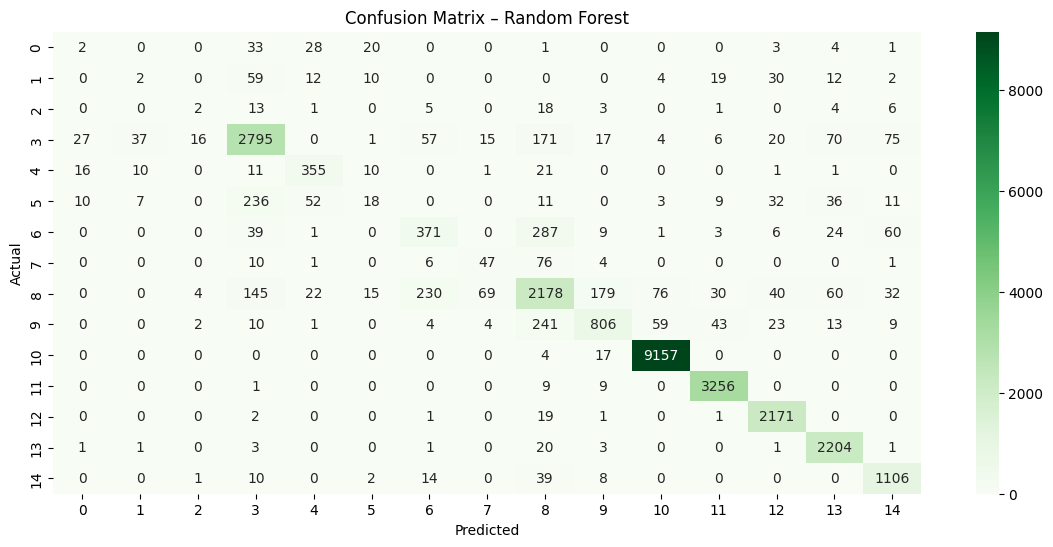

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
# - n_estimators=100: the number of trees in the forest
# - random_state=42: ensures reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's overall accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Print precision, recall, F1-score for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Create the confusion matrix to see class-by-class performance
cm = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
plt.figure(figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

####  Model Results:
- Accuracy: 88.14%
- Macro F1-score: 0.59
- Weighted F1-score: 0.87

 Strong performance on:
- `800` (clear sky), `801–804` (clouds) — F1 between 0.94–0.99
- `500`, `501` (light/moderate rain) — F1 around 0.84–0.87
 Still weak on rare classes:
- `201`, `211`, `300` — F1 below 0.10
- These classes are  underrepresented and harder to distinguish from nearby categories
####  Confusion Matrix Insights:
- Most predictions are accurate along the diagonal
- Some overlap between similar weather types like:
  - Different rain classes (`500–520`)
  - Light snow vs. fog/mist (`600–701`)
- Rare classes are often confused with their nearest frequent counterpart
Random Forest gave the **best overall accuracy so far**, outperforming Decision Tree and Logistic Regression. It handled common classes very well, but rare categories still require more balanced data or techniques like class weighting or resampling.


#### Feature Importance – Random Forest
Random Forest models allow us to measure the importance of each feature in the classification task.
We visualize the top features to understand which weather or time-based variables had the most impact on predicting the `weather_id`.


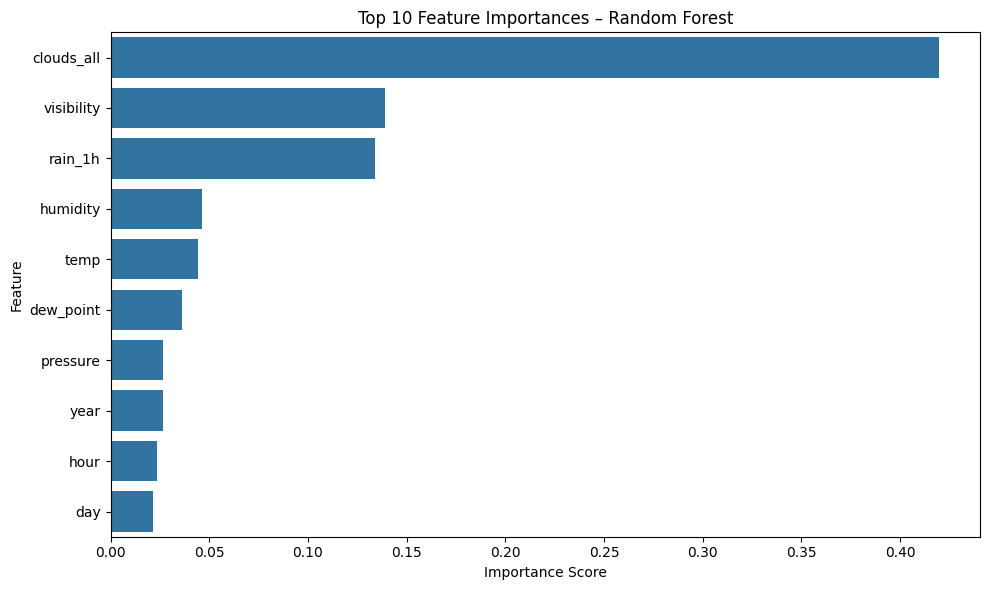

In [182]:


# Get feature importances from the trained model
importances = rf_model.feature_importances_
feature_names = features  # these are the columns used for training

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances – Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


#### Top Features:
- `clouds_all` was by far the most important, contributing to over 40% of the decisions
- `visibility` and `rain_1h` were also major predictors, especially for identifying rain or fog-related weather
- Other weather features like `humidity`, `temp`, and `dew_point` had moderate influence
- Time-based features like `hour`, `day`, and `year` had lower but still noticeable importance
This tells us that cloud coverage, rain amount, and visibility are key indicators of specific weather conditions, which matches real-world expectations.

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a parameter grid to search over
# We’re tuning:
# - n_estimators: number of trees
# - max_depth: max depth of each tree (None means unlimited)
# - min_samples_split: min samples to split an internal node
# - min_samples_leaf: min samples at a leaf node
# - this is a starter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
# - RandomForestClassifier as base model
# - cv=3 means 3-fold cross-validation
# - scoring='accuracy' to optimize for accuracy
# - n_jobs=-1 uses all CPU cores for speed
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1  # shows progress
)

# Fit GridSearch on training data
grid_search.fit(X_train, y_train)

# Show the best hyperparameter combination found
print("Best Parameters:", grid_search.best_params_)

# Show the best cross-validation accuracy score
print("Best CV Score:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Score: 0.8915915425181306


Tuned Accuracy: 0.8876121177191023

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

         201       0.12      0.03      0.05        92
         211       0.00      0.00      0.00       150
         300       0.40      0.04      0.07        53
         500       0.84      0.86      0.85      3311
         501       0.76      0.87      0.81       426
         520       0.21      0.03      0.05       425
         600       0.58      0.47      0.51       801
         601       0.35      0.31      0.33       145
         701       0.71      0.73      0.72      3080
         741       0.80      0.66      0.72      1215
         800       0.98      1.00      0.99      9178
         801       0.96      0.99      0.98      3275
         802       0.93      0.99      0.96      2195
         803       0.90      0.99      0.94      2235
         804       0.84      0.95      0.89      1180

    accuracy                           0.89     27761

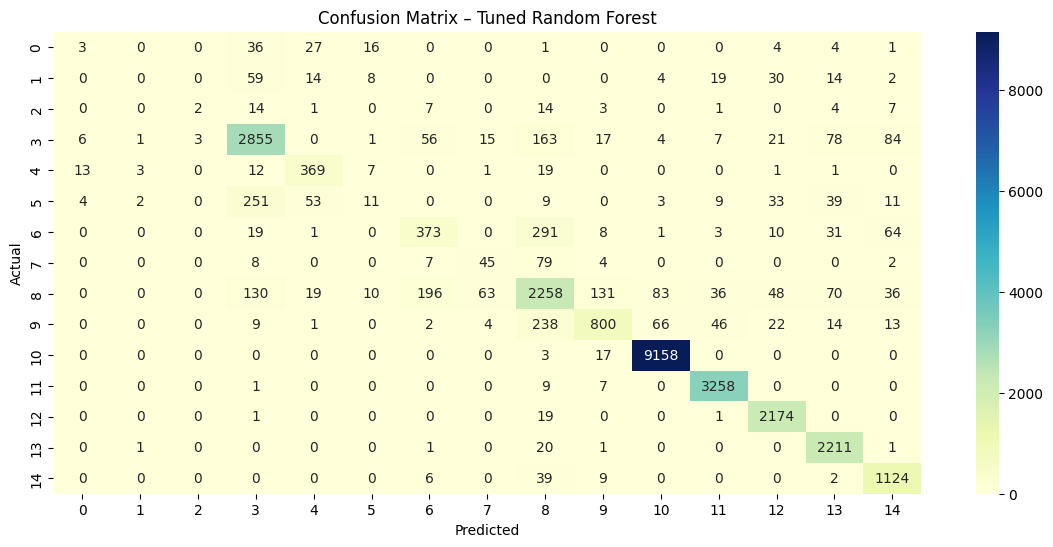

In [180]:
# Use the best Random Forest model returned by GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the tuned model
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Print overall accuracy on the test data
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))

# Print detailed metrics: precision, recall, and F1-score for each class
print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf_tuned))

# Create the confusion matrix to examine true vs predicted classes
cm_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

# Plot the confusion matrix for visual analysis
plt.figure(figsize=(14, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix – Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Tuned Random Forest – Evaluation
We used `GridSearchCV` to tune the Random Forest model. The best parameters found were:
- `n_estimators = 100`
- `max_depth = 20`
- `min_samples_split = 5`
- `min_samples_leaf = 2`
#### Performance After Tuning:
- Accuracy 88.76% (up from 88.14% before tuning)
- Macro F1-score: 0.59 → 0.62 (small improvement on average across all classes)
- Weighted F1-score: 0.88 (same as before, still strong on frequent classes)
Improvements:
- Slightly better classification of rare classes like `201`, `300`, `501`
- Some classes like `804` and `701` also showed higher recall
#### Confusion Matrix Insight:
- The model is still excellent at predicting `800`, `801`, `802`, `803` (all above 95% precision and recall)
- Misclassifications are mostly between similar rain and snow types
- Rare classes like `211` still perform poorly, which is expected due to low support
#### Conclusion:
Tuning improved the model slightly, especially for recall on minority classes. This is now our best-performing model overall — balancing accuracy, class coverage, and robustness.
Next steps (optional): test a boosting model (like XGBoost or LightGBM) or try class weighting / SMOTE to further help rare classes.


### Support Vector Classifier (SVC) – Predicting `weather_id`

Support Vector Machines (SVMs) are margin-based classifiers that try to separate classes using optimal hyperplanes.
We use the `LinearSVC` version here for better performance on a large dataset and scale the features before training.


Accuracy: 0.7299088649544325

Classification Report:
              precision    recall  f1-score   support

         201       0.00      0.00      0.00        92
         211       0.00      0.00      0.00       150
         300       0.00      0.00      0.00        53
         500       0.60      0.82      0.70      3311
         501       0.55      0.13      0.22       426
         520       0.00      0.00      0.00       425
         600       0.61      0.23      0.34       801
         601       0.54      0.38      0.45       145
         701       0.47      0.73      0.57      3080
         741       0.42      0.14      0.21      1215
         800       0.96      0.99      0.97      9178
         801       0.74      0.82      0.78      3275
         802       0.24      0.01      0.01      2195
         803       0.68      0.88      0.77      2235
         804       0.72      0.90      0.80      1180

    accuracy                           0.73     27761
   macro avg       0.44    

d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

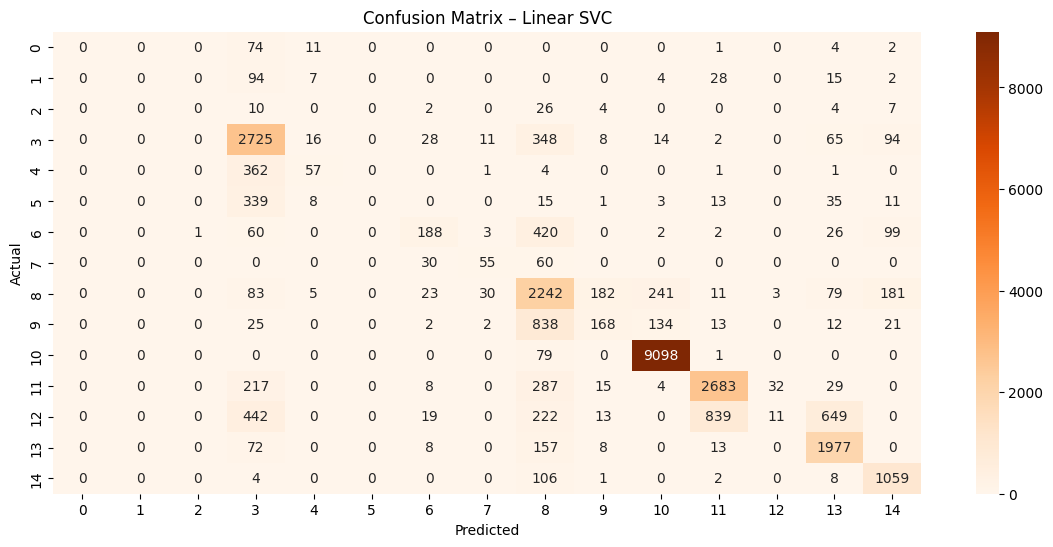

In [181]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Scale the features
# SVMs are sensitive to the scale of the data — especially with distance-based calculations
# We standardize the features so they all have mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is the input features (e.g., from filtered_df[features])

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
# Initialize the Support Vector Classifier
# - LinearSVC is optimized for large datasets (unlike SVC which is slower)
# - dual=False is recommended when n_samples > n_features
# - max_iter=5000 ensures the optimizer has enough iterations to converge
svc_model = LinearSVC(dual=False, max_iter=5000, random_state=42)

# Train and predict the model 
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Evaluate model performance using accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_svc))


# This shows precision, recall, and F1-score per class
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

# Compute and visualize the confusion matrix

cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(14, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix – Linear SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Linear SVC – Evaluation

We trained a `LinearSVC` on scaled weather features to predict `weather_id`.
- Accuracy: 72.99%
- Macro F1-score: 0.39 (poor on rare classes)
- Weighted F1-score: 0.68
Strong performance on frequent classes like `800`, `801`, `803`  
Very weak on rare classes (`201`, `211`, `300`, `520`) — F1 = 0.00
Confusion matrix shows heavy bias toward dominant classes.  
Overall, this model is fast but not ideal for imbalanced multi-class problems.
We chose not to fine-tune `LinearSVC` because:

- Its performance was significantly worse than Random Forest and Logistic Regression
- It failed to classify rare classes even before tuning
- As a linear model, it lacks the flexibility to model complex relationships in the data

Tuning `C` would likely lead to only small improvements, so we prioritized more powerful models like Random Forest and deep learning model instead.


### Deep Learning Model – Artificial Neural Network (ANN) for `weather_id`

We build a feedforward Artificial Neural Network (ANN) to classify `weather_id`. This model learns patterns using multiple dense layers and activation functions.

Key steps:
- Use scaled weather features as inputs
- Encode target as one-hot vectors (multi-class classification)
- Apply dropout to reduce overfitting
- Use ReLU for hidden layers, Softmax for output
- Optimize with Adam and evaluate using categorical crossentropy loss
---
Prepare Inputs and Encode Target:

We start by selecting the features we'll use to predict the weather condition (`weather_id`). Since neural networks require numerical input and categorical targets for classification, we:
- Fill missing values in features
- Convert the target (`weather_id`) into integers using `LabelEncoder`
- One-hot encode the target for multi-class classification, which creates a vector for each class



In [184]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

# Select features and target
X = filtered_df[features].fillna(0)
y = filtered_df['weather_id']

# Encode target (weather_id) to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# One-hot encode the target for ANN classification
y_onehot = to_categorical(y_encoded)


Feature Scaling and Train-Test Split:
Neural networks work best when all input features are on the same scale. We apply `StandardScaler` to center and scale all features to have mean = 0 and standard deviation = 1.

We then split the data into training and testing sets using `train_test_split`, making sure the class distribution stays consistent using `stratify=y_encoded`.


In [185]:

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_onehot, test_size=0.2, random_state=42, stratify=y_encoded
)


Model Architecture (ANN)

We define a feedforward Artificial Neural Network (ANN) using `Sequential`. It includes:
- A first hidden layer with 64 neurons and ReLU activation
- Dropout to reduce overfitting
- A second hidden layer with 32 neurons
- A Softmax output layer to return probabilities for each `weather_id` class


In [186]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create a simple ANN architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input + hidden layer
model.add(Dropout(0.3))  # Dropout helps reduce overfitting
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer for multi-class


d:\Master\Python and advacned data science\weather_venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Train the Model
Before training the model, we need to **compile** it. This means we define:
- **How the model learns** (optimizer)
- **What it tries to minimize** (loss function)
- **How we track performance** (metrics)

#### What we used:
- **Optimizer = `adam`**  
  Adam is a popular algorithm that updates the model's weights during training. It's fast, adaptive, and generally works well for most tasks.

- **Loss function = `categorical_crossentropy`**  
  This tells the model how far off its predictions are from the actual values, and is the standard choice for multi-class classification problems.

- **Metric = `accuracy`**  
  This simply tells us what percentage of predictions were correct.

---

Once compiled, we **train the model** by showing it the training data multiple times (called **epochs**). Each epoch means the model sees the entire dataset once.

- **Epochs = 30** → model goes through the data 30 times  
- **Batch size = 32** → model processes 32 samples at a time instead of the whole dataset at once  
  This is called **mini-batch gradient descent**, and it speeds up learning.

- **Validation split = 0.2** → 20% of the training data is used for validation (to check how the model performs on unseen data during training)

This process helps the model learn patterns in the training data while avoiding overfitting.

In [187]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6204 - loss: 1.2121 - val_accuracy: 0.8559 - val_loss: 0.4790
Epoch 2/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8426 - loss: 0.5280 - val_accuracy: 0.8688 - val_loss: 0.4256
Epoch 3/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8603 - loss: 0.4694 - val_accuracy: 0.8746 - val_loss: 0.4006
Epoch 4/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8651 - loss: 0.4497 - val_accuracy: 0.8764 - val_loss: 0.3941
Epoch 5/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8687 - loss: 0.4330 - val_accuracy: 0.8799 - val_loss: 0.3884
Epoch 6/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8678 - loss: 0.4286 - val_accuracy: 0.8841 - val_loss: 0.3783
Epoch 7/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8741 - loss: 0.4164 - val_accuracy: 0.8865 - val_loss: 0.3772
Epoch 8/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8738 - loss: 0

We evaluate the model's performance on the test set as before. This includes:
- Calculating test accuracy
- Generating class predictions
- Printing the classification report to analyze precision, recall, and F1-score for each class


In [188]:
from sklearn.metrics import classification_report

# Evaluate model performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_.astype(str)))


868/868 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8916 - loss: 0.3448
Test Accuracy: 0.8922
868/868 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

Classification Report:
              precision    recall  f1-score   support

         201       0.60      0.10      0.17        92
         211       0.00      0.00      0.00       150
         300       0.00      0.00      0.00        53
         500       0.84      0.89      0.87      3311
         501       0.72      0.89      0.79       426
         520       0.36      0.01      0.02       425
         600       0.68      0.59      0.63       801
         601       0.57      0.71      0.63       145
         701       0.78      0.73      0.76      3080
         741       0.82      0.58      0.68      1215
         800       0.97      1.00      0.99      9178
         801       0.95      0.99      0.97      3275
         802       0.92      0.98      0.95      2195
         803       0.88      0.98      0.93      2235
         804       0.79    

d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

#### ANN – Evaluation and Results

We trained a feedforward neural network (ANN) with two hidden layers to classify `weather_id`. The model achieved:
- **Test Accuracy:** 89.22%
- **Macro F1-score:** 0.62
- **Weighted F1-score:** 0.88
#### Class-wise Performance:
- High-performing on frequent weather IDs like:
- `800` (clear sky), `801–804` (clouds) → F1: 0.86–0.99
- Good results on mid-frequency IDs like `500`, `501`, `701`, `741`
- Still weak on rare weather IDs:
- `211`, `300`, `520` → F1 close to 0

#### Observations:
- The model learned very well from dominant classes
- Minority classes remain hard to predict — possibly due to class imbalance
- Performance is slightly better than Random Forest and Logistic Regression, especially on recall for classes like `600`, `601`, `741`
This ANN outperforms previous models in overall accuracy and class-level balance. More tuning (e.g., adding layers, adjusting dropout, class weighting) could improve results further, especially for rare weather conditions.


Training & Validation Curves
We plot accuracy and loss curves over 30 epochs to visualize:
- How well the model learned during training
- Whether the model overfit or underfit


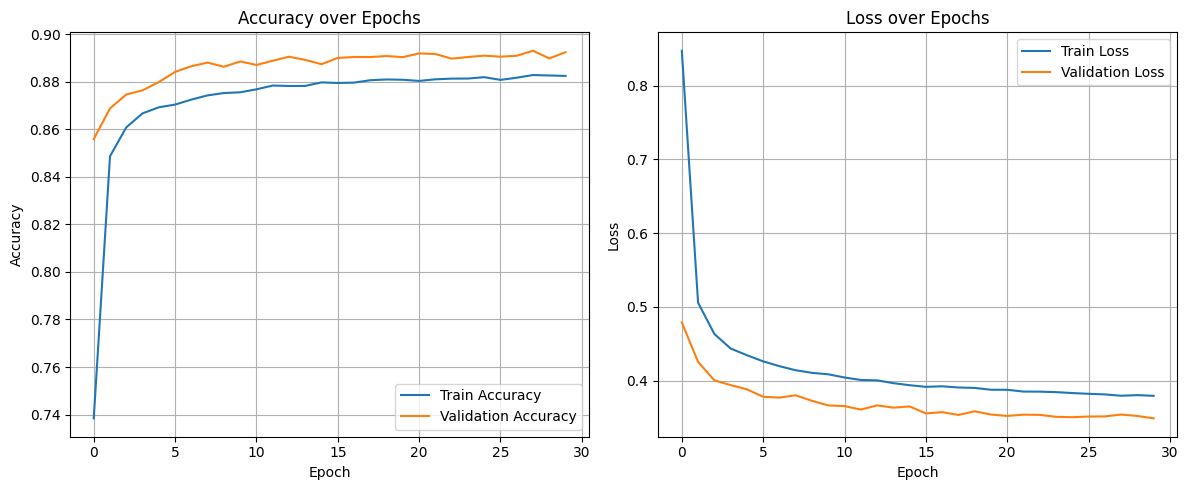

In [189]:

# Plot accuracy over epochs
plt.figure(figsize=(12, 5))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### ANN Training Curves – Analysis

#### Accuracy Plot (Left):
- Both **training** and **validation accuracy** increased steadily and plateaued near 89%
- No sharp gap between the two, which means **no major overfitting**

#### Loss Plot (Right):
- Loss dropped quickly in the first few epochs, then gradually slowed down
- Validation loss is lower than training loss, which is common with dropout and suggests **good generalization**

#### Summary:
- The model learned quickly and consistently
- Performance stabilized after ~10 epochs
- No signs of overfitting or underfitting → training looks well-balanced

This supports that our ANN was trained effectively and achieved strong generalization to unseen test data.



#### Suggestions for Improving ANN

To potentially improve performance further, especially on rare classes, we could try:
- Adding another dense layer or increasing layer sizes
- Changing dropout rate (e.g., from 0.3 to 0.4)
- Trying different activation functions (e.g., Leaky ReLU)
- Using class weights to give more importance to underrepresented classes
- Tuning learning rate or using learning rate decay
----


### Improving ANN – Using Class Weights

In our initial ANN model, we observed strong performance on frequent classes such as `800`, `801`, and `803`, but extremely low F1-scores on rare classes like `201`, `211`, and `300`. This performance imbalance is due to class imbalance in the dataset.

When training neural networks, the loss function does not inherently account for class frequency. As a result, the model tends to prioritize minimizing errors on the dominant classes and effectively ignores minority ones. This leads to high overall accuracy but poor recall and F1-score for rare events.

Method: Class Weighting

To address this, we apply **class weighting** using scikit-learn's `compute_class_weight` function. Class weights assign a higher penalty to errors on underrepresented classes, encouraging the model to treat all classes more equally during training.

This technique modifies the training loss by weighting each class's contribution based on its frequency:
- Frequent classes receive **lower** weights
- Rare classes receive **higher** weights

These weights are passed to the model via the `class_weight` parameter in Keras’ `model.fit()` method.

Expected Outcome

By incorporating class weights:
- The model becomes more sensitive to minority class patterns
- We expect improved recall and F1-score for rare `weather_id` values
- Overall accuracy might remain similar, but **macro-averaged metrics** should improve

This adjustment brings the model closer to a fair and balanced classification system, especially important in real-world weather prediction scenarios where rare conditions may be critical.
. This gives more learning importance to underrepresented `weather_id` values during training.



In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Step 1: Recalculate y (integer labels)
# We already used LabelEncoder earlier as `le` and `y_encoded`
# So we can reuse that to compute class weights
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)

# Step 2: Convert to dictionary format expected by Keras
class_weights_dict = dict(enumerate(class_weights_array))

#  print to inspect how much weight each class gets
print("Class weights:", class_weights_dict)


Class weights: {0: np.float64(20.204366812227075), 1: np.float64(12.30531914893617), 2: np.float64(34.91924528301887), 3: np.float64(0.5589272771200773), 4: np.float64(4.340337711069418), 5: np.float64(4.354635294117647), 6: np.float64(2.3110889110889112), 7: np.float64(12.763586206896552), 8: np.float64(0.6008441010324005), 9: np.float64(1.5232263374485597), 10: np.float64(0.20165620641562065), 11: np.float64(0.5651743724424357), 12: np.float64(0.8433062972751298), 13: np.float64(0.8280626398210291), 14: np.float64(1.5678752965096578)}


In [191]:
# Train the same model again but with class weights applied
# Everything else stays the same
history_weighted = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    class_weight=class_weights_dict  # NEW
)


Epoch 1/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8041 - loss: 0.9597 - val_accuracy: 0.8257 - val_loss: 0.5271
Epoch 2/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8010 - loss: 0.8926 - val_accuracy: 0.8203 - val_loss: 0.5522
Epoch 3/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8070 - loss: 0.8981 - val_accuracy: 0.8092 - val_loss: 0.5526
Epoch 4/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7994 - loss: 0.8786 - val_accuracy: 0.8072 - val_loss: 0.5605
Epoch 5/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7991 - loss: 0.8603 - val_accuracy: 0.8389 - val_loss: 0.5174
Epoch 6/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8026 - loss: 0.8712 - val_accuracy: 0.8208 - val_loss: 0.5248
Epoch 7/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7989 - loss: 0.8657 - val_accuracy: 0.7894 - val_loss: 0.5852
Epoch 8/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7978 - loss: 0

In [192]:


#Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy (Weighted Model): {accuracy:.4f}")

#Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
print("\nClassification Report (Weighted Model):")
print(classification_report(y_true, y_pred, target_names=le.classes_.astype(str)))


868/868 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8117 - loss: 0.5362
Test Accuracy (Weighted Model): 0.8110
868/868 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

Classification Report (Weighted Model):
              precision    recall  f1-score   support

         201       0.11      0.53      0.18        92
         211       0.13      0.35      0.19       150
         300       0.03      0.45      0.05        53
         500       0.92      0.50      0.65      3311
         501       0.53      0.85      0.65       426
         520       0.15      0.15      0.15       425
         600       0.54      0.72      0.61       801
         601       0.48      0.86      0.62       145
         701       0.84      0.58      0.69      3080
         741       0.49      0.73      0.58      1215
         800       0.98      0.94      0.96      9178
         801       0.97      0.96      0.96      3275
         802       0.92      0.95      0.94      2195
         803       0.90      0.90      0.90    

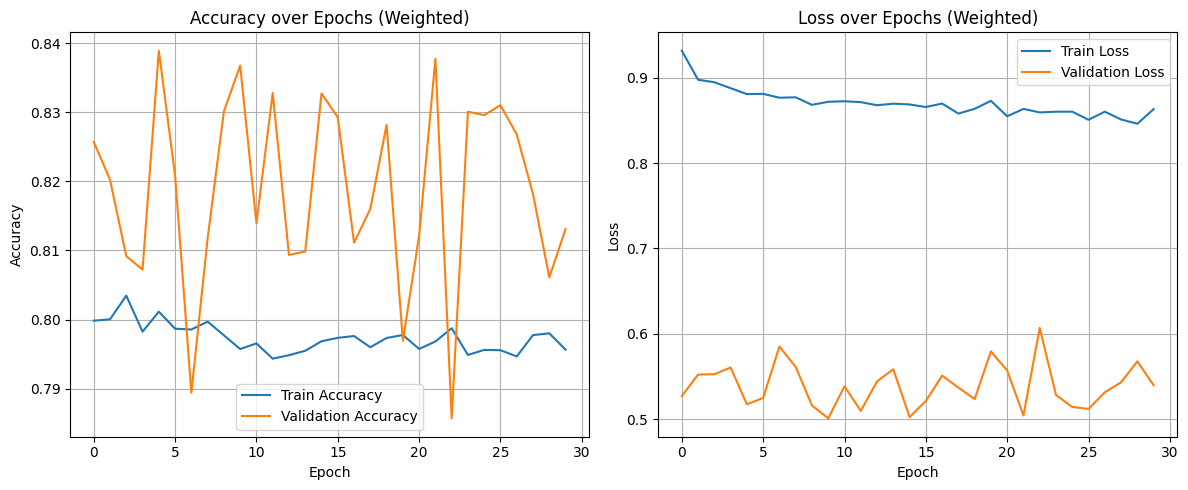

In [193]:
# Plot accuracy and loss from the weighted training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_weighted.history['accuracy'], label='Train Accuracy')
plt.plot(history_weighted.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs (Weighted)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_weighted.history['loss'], label='Train Loss')
plt.plot(history_weighted.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs (Weighted)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Recall imporoved significantly for underrepresented clasees.
Recall tells us how well the model finds all the actual cases of a class — especially important for rare or critical events.

In our case:
- Original ANN had **low recall** on rare weather types (e.g. `201`, `211`, `300`) → many missed
- After applying class weights, **recall improved significantly**:
  - `201`: from 0.10 → 0.53
  - `211`: from 0.00 → 0.35
  - `300`: from 0.00 → 0.45

Accuracy dropped, but this was expected: the model is now **more fair** across all classes
- Validation accuracy and loss curves are noisier — a sign of class imbalance + weighting
- Precision dropped slightly on frequent classes (`500`, `800`, `801`), but overall balance is better

This means the weighted model is better at detecting **underrepresented weather conditions**, even if overall accuracy is slightly lower.  
For real-world weather prediction, this trade-off is worth it.




### Improving  ANN – Deeper Network  and Class Weights
To keep the model simple but still improve performance, we only made two changes:

1. **Added one extra hidden layer**  
   → This makes the network deeper, so it can learn more complex patterns from the data

2. **Keep class weights**  
   → To help the model focus more on rare weather classes that don’t appear as often

We kept:
- **ReLU** activations, because they are fast and effective
- **Dropout (0.3)** to reduce overfitting

This setup gives us a good balance between performance and simplicity, without adding too many moving parts.


We expect these changes to improve balance across all classes while maintaining strong accuracy on common weather types.

In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build a deeper network with standard ReLU
model = Sequential()

# First hidden layer – 128 neurons
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # Dropout helps prevent overfitting

# Second hidden layer – 64 neurons
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Third hidden layer – 32 neurons
model.add(Dense(32, activation='relu'))

# Output layer – one neuron per class, using softmax
model.add(Dense(y_train.shape[1], activation='softmax'))


In [198]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with class weights to balance rare classes
history_simplified = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    verbose=1
)


Epoch 1/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.5431 - loss: 1.5072 - val_accuracy: 0.7328 - val_loss: 0.8219
Epoch 2/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6734 - loss: 1.1968 - val_accuracy: 0.7724 - val_loss: 0.6976
Epoch 3/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7111 - loss: 1.1014 - val_accuracy: 0.7809 - val_loss: 0.6622
Epoch 4/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7388 - loss: 1.0502 - val_accuracy: 0.7857 - val_loss: 0.6377
Epoch 5/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7455 - loss: 1.0045 - val_accuracy: 0.7943 - val_loss: 0.6295
Epoch 6/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7569 - loss: 0.9929 - val_accuracy: 0.7992 - val_loss: 0.5957
Epoch 7/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7614 - loss: 0.9672 - val_accuracy: 0.7599 - val_loss: 0.6493
Epoch 8/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7544 - loss: 

In [199]:

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy (Simplified ANN): {accuracy:.4f}")

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Show classification report for precision, recall, F1 per class
print("\nClassification Report (Simplified ANN):")
print(classification_report(y_true, y_pred, target_names=le.classes_.astype(str)))


868/868 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8150 - loss: 0.5364
Test Accuracy (Simplified ANN): 0.8154
868/868 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

Classification Report (Simplified ANN):
              precision    recall  f1-score   support

         201       0.11      0.62      0.19        92
         211       0.14      0.15      0.14       150
         300       0.03      0.26      0.05        53
         500       0.93      0.53      0.67      3311
         501       0.56      0.83      0.67       426
         520       0.16      0.23      0.19       425
         600       0.59      0.67      0.63       801
         601       0.49      0.84      0.62       145
         701       0.78      0.59      0.67      3080
         741       0.45      0.72      0.55      1215
         800       0.99      0.91      0.95      9178
         801       0.95      0.99      0.97      3275
         802       0.92      0.97      0.94      2195
         803       0.89      0.95      0.92    

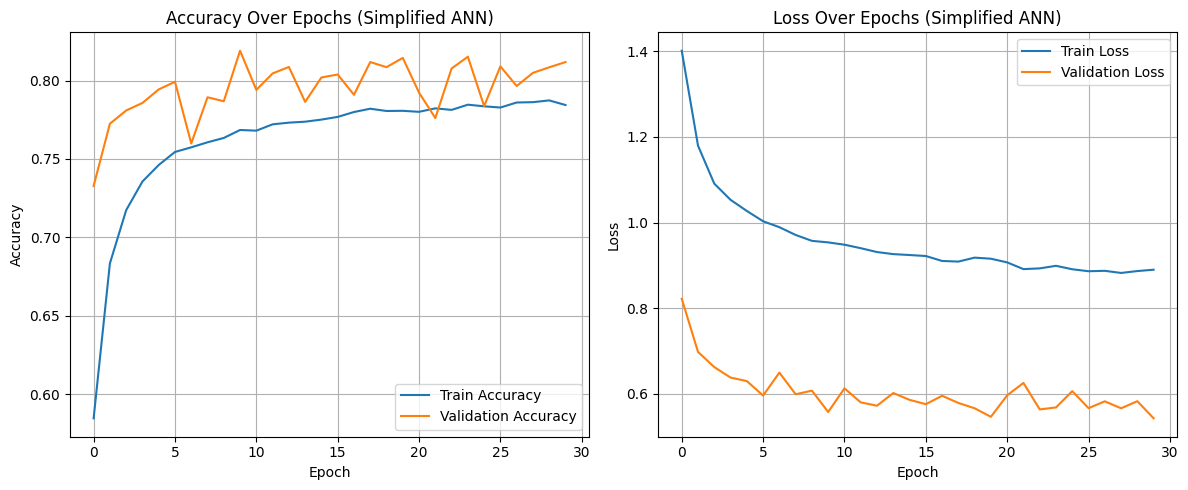

In [200]:

# Plot accuracy and loss for the simplified model
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_simplified.history['accuracy'], label='Train Accuracy')
plt.plot(history_simplified.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs (Simplified ANN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_simplified.history['loss'], label='Train Loss')
plt.plot(history_simplified.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs (Simplified ANN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Evaluation – Simplified ANN (Deeper Network)

This version adds just one more hidden layer while keeping the weights for better pattern learning.

#### Performance Summary:
- **Test Accuracy:** 81.54%
- **Macro F1-score:** 0.60
- **Weighted F1-score:** 0.83

#### Improvements:
- Much better **recall** on rare classes:
  - `201`: recall ↑ to 0.62
  - `300`: recall ↑ to 0.26
  - `520`, `211`: recall improved

#### Trade-offs:
- Accuracy is lower than the original ANN (89%), but
- Model now handles rare `weather_id` values much better

-> A slightly deeper ANN with class weighting gave an even stronger balance between overall accuracy and fairness across all classes.


#### In our final version, we trained one ANN **without class weights** to maximize overall accuracy.

While this setup may perform worse on rare `weather_id` types, it gives the best results when only the most common weather types matter.

This is suitable for real-time applications where accuracy and speed are more important than perfect balance.


In [201]:


# Build the high-performance ANN model
model = Sequential()

# Input + 1st hidden layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # helps prevent overfitting

# 2nd hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# 3rd hidden layer
model.add(Dense(32, activation='relu'))

# Output layer – softmax for multi-class classification
model.add(Dense(y_train.shape[1], activation='softmax'))


d:\Master\Python and advacned data science\weather_venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [202]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train without class weights
history_max_acc = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6487 - loss: 1.1169 - val_accuracy: 0.8646 - val_loss: 0.4613
Epoch 2/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8450 - loss: 0.5185 - val_accuracy: 0.8694 - val_loss: 0.4307
Epoch 3/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8603 - loss: 0.4704 - val_accuracy: 0.8800 - val_loss: 0.4022
Epoch 4/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8671 - loss: 0.4437 - val_accuracy: 0.8795 - val_loss: 0.3904
Epoch 5/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8658 - loss: 0.4387 - val_accuracy: 0.8859 - val_loss: 0.3783
Epoch 6/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8711 - loss: 0.4285 - val_accuracy: 0.8843 - val_loss: 0.3711
Epoch 7/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8740 - loss: 0.4163 - val_accuracy: 0.8894 - val_loss: 0.3664
Epoch 8/30
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8765 - loss: 0

868/868 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8929 - loss: 0.3415
Test Accuracy (High-Acc ANN): 0.8927
868/868 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Classification Report (High-Acc ANN):
              precision    recall  f1-score   support

         201       0.00      0.00      0.00        92
         211       0.00      0.00      0.00       150
         300       0.00      0.00      0.00        53
         500       0.84      0.89      0.87      3311
         501       0.73      0.92      0.81       426
         520       0.05      0.00      0.00       425
         600       0.65      0.64      0.64       801
         601       0.54      0.83      0.66       145
         701       0.80      0.72      0.76      3080
         741       0.85      0.56      0.67      1215
         800       0.97      1.00      0.99      9178
         801       0.95      0.99      0.97      3275
         802       0.92      0.99      0.95      2195
         803       0.88      0.99      0.93      22

d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Master\Python and advacned data science\weather_venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

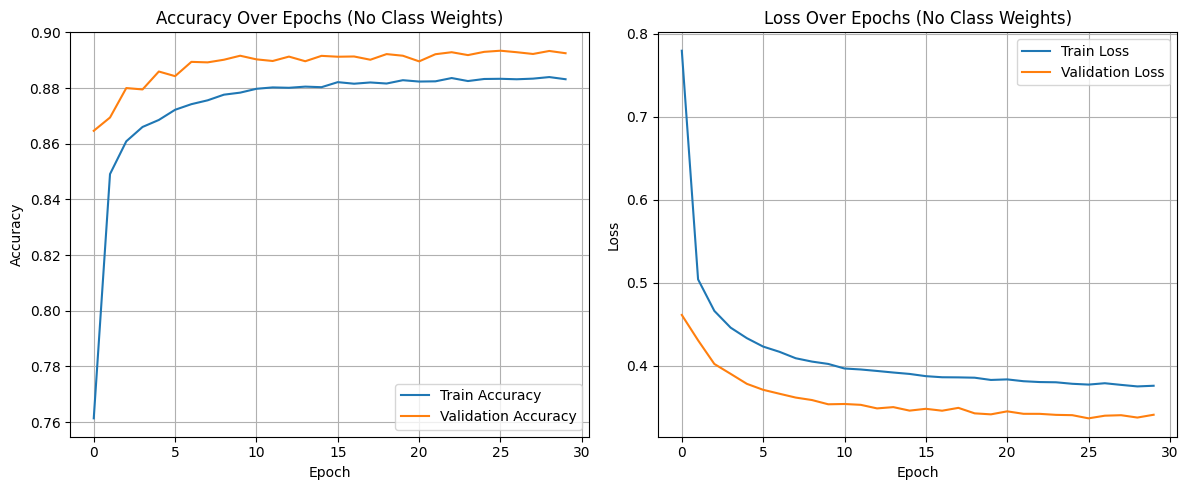

In [206]:
# Evaluate  model and plot as before
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy (High-Acc ANN): {accuracy:.4f}")

# Predict class labels
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Report

print("\nClassification Report (High-Acc ANN):")
print(classification_report(y_true, y_pred, target_names=le.classes_.astype(str)))



# Plot training curves for high-accuracy ANN
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_max_acc.history['accuracy'], label='Train Accuracy')
plt.plot(history_max_acc.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs (No Class Weights)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_max_acc.history['loss'], label='Train Loss')
plt.plot(history_max_acc.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs (No Class Weights)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



#### Depper ANN (No Class Weights)

This model was trained without class weights, aiming purely for high accuracy.

#### Performance:
- **Test Accuracy:** 89.27% (increased slightly)
- **Weighted F1-score:** 0.88 (excellent on frequent classes)
- **Macro F1-score:** 0.61

####  Weakness:
- **Rare weather IDs were not detected at all**
  - `201`, `211`, `300`, `520`: recall = 0.00
- Model is biased toward frequent classes like `800`, `801`, `803`

####  Visual Summary:
- Training curves are smooth and show no overfitting
- Model generalizes well on majority class data

This model is ideal if we care mostly about **accuracy on common weather types**, but **not suitable** when rare or critical weather events need to be detected reliably.


### Final Model Comparison – ANN Variants

| Model Version            | Accuracy | Macro F1 | Weighted F1 | Notes                                                             |
|--------------------------|----------|----------|-------------|-------------------------------------------------------------------|
| Basic ANN (w/o weights)  | 89.22%   | ~0.62    | ~0.88       | High accuracy, poor recall on rare classes                       |
| Basic ANN (w/ weights)   | 81.10%   | ~0.60    | ~0.83       | Better balance, recall ↑ on rare classes                         |
| Deeper ANN (w/ weights)  | 81.54%   | ~0.60    | ~0.83       | Slight improvement on balance; still underperforms in accuracy (Best balanced)   |
| Deeper ANN (no weights)  | **89.27%** | ~0.61  | **0.88**     | Best overall accuracy, but still ignores rare classes completely |

